LAND SUBMERGE ANALYSIS


In [ ]:
import pandas as pd
mydata = pd.read_csv("global temp.csv")
mydata

YEAR  TempAnomalies  LandTempAaomalies  OceanTempAnomalies
0    1851          -0.15              -0.37               -0.05
1    1852          -0.09              -0.28               -0.01
2    1853          -0.08              -0.42                0.06
3    1854          -0.13              -0.39               -0.01
4    1855          -0.10              -0.30               -0.01
..    ...            ...                ...                 ...
168  2019           0.89               1.33                0.68
169  2020           1.02               1.58                0.76
170  2021           0.92               1.48                0.66
171  2022           0.91               1.47                0.65
172  2023           0.92               1.46                0.68

[173 rows x 4 columns]

Index(['TempAnomalies', 'LandTempAaomalies', 'OceanTempAnomalies'], dtype='object')


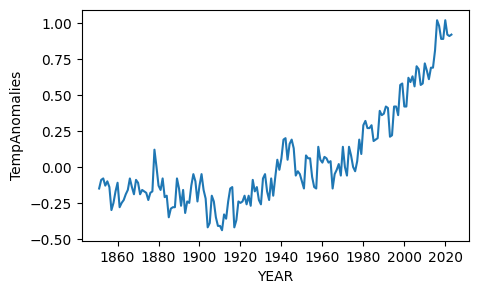

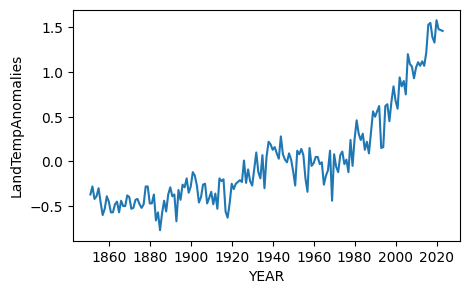

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load time series data
data = pd.read_csv("/content/drive/MyDrive/MP/DSR project/datasets/global temp.csv", parse_dates=['YEAR'], index_col='YEAR')
print(data.columns)

# Visualize time series
plt.figure(figsize=(5,3))
plt.plot(data.TempAnomalies)
plt.xlabel('YEAR')
plt.ylabel('TempAnomalies')
plt.show()

plt.figure(figsize=(5,3))
plt.plot(data.LandTempAaomalies)
plt.xlabel('YEAR')
plt.ylabel('LandTempAnomalies')
plt.show()

plt.figure(figsize=(5,3))
plt.plot(data.OceanTempAnomalies)
plt.xlabel('YEAR')
plt.ylabel('OceanTempAnomalies')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
mydata = pd.read_csv("global glaciermb.csv")
mydata

YEAR  ANNUAL_BALANCE          ELA        AAR
0    1919     -211.000000  2785.000000  45.000000
1    1920       33.000000  2705.000000  64.000000
2    1921    -2354.000000  3065.000000   0.000000
3    1922       74.000000  2695.000000  67.000000
4    1923     -149.000000  2755.000000  51.000000
..    ...             ...          ...        ...
98   2017     -941.836735  1804.163265  29.975000
99   2018    -1215.183673  2063.122449  22.024390
100  2019    -1167.880000  2037.360000  23.300000
101  2020     -656.775510  2067.530612  32.300000
102  2021     -872.500000  1628.789474  26.857143

[103 rows x 4 columns]

Index(['ANNUAL_BALANCE', 'ELA', 'AAR'], dtype='object')


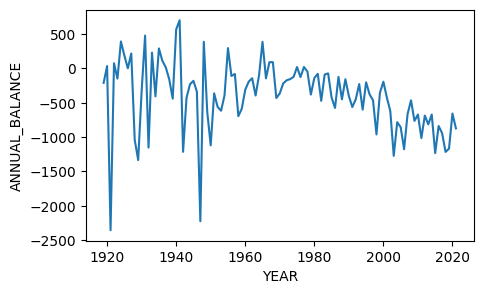

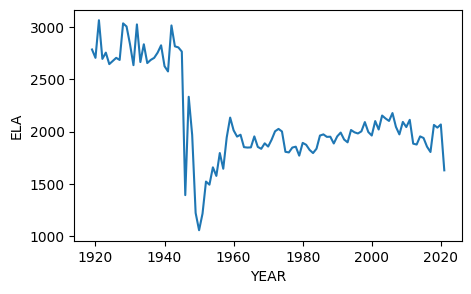

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load time series data
data = pd.read_csv("global glaciermb.csv", parse_dates=['YEAR'], index_col='YEAR')
print(data.columns)

# Visualize time series
plt.figure(figsize=(5,3))
plt.plot(data.ANNUAL_BALANCE)
plt.xlabel('YEAR')
plt.ylabel('ANNUAL_BALANCE')
plt.show()

plt.figure(figsize=(5,3))
plt.plot(data.ELA)
plt.xlabel('YEAR')
plt.ylabel('ELA')
plt.show()

plt.figure(figsize=(5,3))
plt.plot(data.AAR)
plt.xlabel('YEAR')
plt.ylabel('AAR')
plt.show()

In [ ]:
import pandas as pd
mydata = pd.read_csv("GMSL.csv")
mydata

YEAR   GMSL  GMSLUncertainty
0    1880 -158.7             24.2
1    1881 -153.1             24.2
2    1882 -169.9             23.0
3    1883 -164.6             22.8
4    1884 -143.7             22.2
..    ...    ...              ...
129  2009   58.0              6.9
130  2010   65.7              7.1
131  2011   67.3              7.5
132  2012   76.1              8.3
133  2013   67.7              8.9

[134 rows x 3 columns]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load time series data
data = pd.read_csv("GMSL.csv", parse_dates=['YEAR'], index_col='YEAR')
print(data.columns)

x=data.index
y1=data.GMSL+data.GMSLUncertainty
y2=data.GMSL-data.GMSLUncertainty

# Visualize time series
plt.figure(figsize=(5,3))
plt.plot(x,data.GMSL,color='blue')
plt.plot(x,y1,color='skyblue')
plt.plot(x,y2,color='skyblue')
plt.fill_between(x, y1, y2, interpolate=True, alpha=0.2, color='blue')
plt.xlabel('YEAR')
plt.ylabel('GMSL')
plt.show()

Index(['GMSL', 'GMSLUncertainty'], dtype='object')


ARIMA


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pandas as pd

mydata1 = pd.read_csv("global temp.csv")

res = adfuller(mydata1.TempAnomalies.dropna())
print('Augmented Dickey-Fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

Augmented Dickey-Fuller Statistic: 1.258119
p-value: 0.996364


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pandas as pd

mydata2 = pd.read_csv("global glaciermb.csv")

res = adfuller(mydata2.ANNUAL_BALANCE.dropna())
print('Augmented Dickey-Fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

Augmented Dickey-Fuller Statistic: -2.258625
p-value: 0.185660


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pandas as pd

mydata3 = pd.read_csv("GMSL.csv")

res = adfuller(mydata3.GMSL.dropna())
print('Augmented Dickey-Fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

Augmented Dickey-Fuller Statistic: 1.360886
p-value: 0.996929


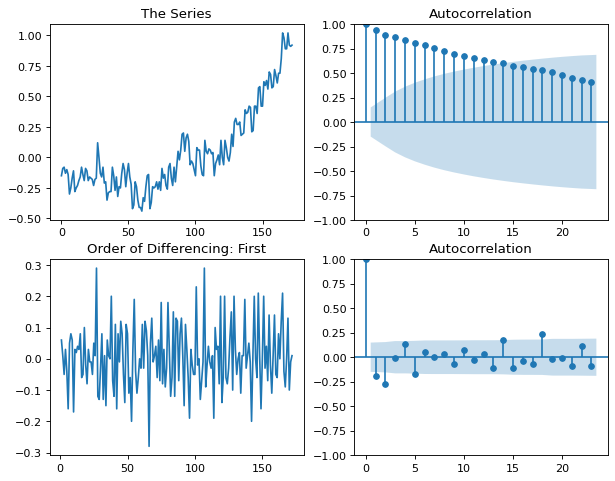

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize' : (9,7), 'figure.dpi' :80})

# The Series
fig, axes = plt.subplots(2,2)
axes[0, 0].plot(mydata1.TempAnomalies);
axes[0, 0].set_title('The Series')
plot_acf(mydata1.TempAnomalies	, ax = axes[0, 1])

# Order of Differencing: First
axes[1, 0].plot(mydata1.TempAnomalies.diff())
axes[1, 0].set_title('Order of Differencing: First')
plot_acf(mydata1.TempAnomalies.diff().dropna(), ax = axes[1, 1])

plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize' : (9,7), 'figure.dpi' :80})

# The Series
fig, axes = plt.subplots(2,2)
axes[0, 0].plot(mydata2.ANNUAL_BALANCE);
axes[0, 0].set_title('The Series')
plot_acf(mydata2.ANNUAL_BALANCE, ax = axes[0, 1])

# Order of Differencing: First
axes[1, 0].plot(mydata2.ANNUAL_BALANCE.diff())
axes[1, 0].set_title('Order of Differencing: First')
plot_acf(mydata2.ANNUAL_BALANCE.diff().dropna(), ax = axes[1, 1])

plt.show()

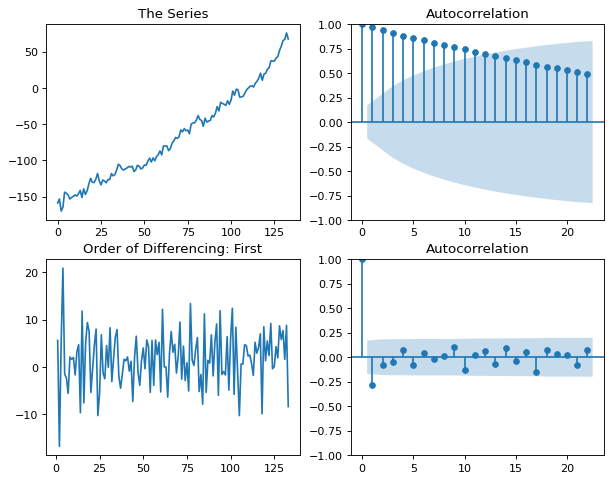

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize' : (9,7), 'figure.dpi' :80})

# The Series
fig, axes = plt.subplots(2,2)
axes[0, 0].plot(mydata3.GMSL);
axes[0, 0].set_title('The Series')
plot_acf(mydata3.GMSL, ax = axes[0, 1])

# Order of Differencing: First
axes[1, 0].plot(mydata3.GMSL.diff())
axes[1, 0].set_title('Order of Differencing: First')
plot_acf(mydata3.GMSL.diff().dropna(), ax = axes[1, 1])

plt.show()

In [ ]:
import statsmodels.api as sm

# Creating ARIMA model
mymodel1 = sm.tsa.ARIMA(mydata1.TempAnomalies, order = (2,1,1))
modelfit1 = mymodel1.fit()
print(modelfit1.summary())

forecast1 = modelfit1.forecast(steps=10)
print(forecast1)

                               SARIMAX Results                                
Dep. Variable:          TempAnomalies   No. Observations:                  173
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 160.905
Date:                Sun, 23 Apr 2023   AIC                           -313.809
Time:                        16:37:34   BIC                           -301.219
Sample:                             0   HQIC                          -308.701
                                - 173                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1889      0.220      0.858      0.391      -0.242       0.620
ar.L2         -0.2218      0.105     -2.114      0.035      -0.427      -0.016
ma.L1         -0.4861      0.197     -2.464      0.0

In [ ]:
import statsmodels.api as sm

# Creating ARIMA model
mymodel2 = sm.tsa.ARIMA(mydata2.ANNUAL_BALANCE, order = (2,1,1))
modelfit2 = mymodel2.fit()
print(modelfit2.summary())

forecast2 = modelfit2.forecast(steps=10)
print(forecast2)

                               SARIMAX Results                                
Dep. Variable:         ANNUAL_BALANCE   No. Observations:                  103
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -775.649
Date:                Sun, 23 Apr 2023   AIC                           1559.299
Time:                        16:38:43   BIC                           1569.798
Sample:                             0   HQIC                          1563.550
                                - 103                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1060      0.104     -1.022      0.307      -0.309       0.097
ar.L2         -0.0856      0.110     -0.781      0.435      -0.300       0.129
ma.L1         -0.8406      0.082    -10.195      0.0

In [ ]:
import statsmodels.api as sm

# Creating ARIMA model
mymodel3 = sm.tsa.ARIMA(mydata3.GMSL, order = (2,1,1))
modelfit3 = mymodel3.fit()
print(modelfit3.summary())

forecast3 = modelfit3.forecast(steps=10)
print(forecast3)

                               SARIMAX Results                                
Dep. Variable:                   GMSL   No. Observations:                  134
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -424.488
Date:                Sun, 23 Apr 2023   AIC                            856.977
Time:                        16:38:49   BIC                            868.538
Sample:                             0   HQIC                           861.675
                                - 134                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3159      5.976     -0.053      0.958     -12.029      11.397
ar.L2         -0.0401      1.055     -0.038      0.970      -2.108       2.028
ma.L1          0.1352      5.977      0.023      0.9

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


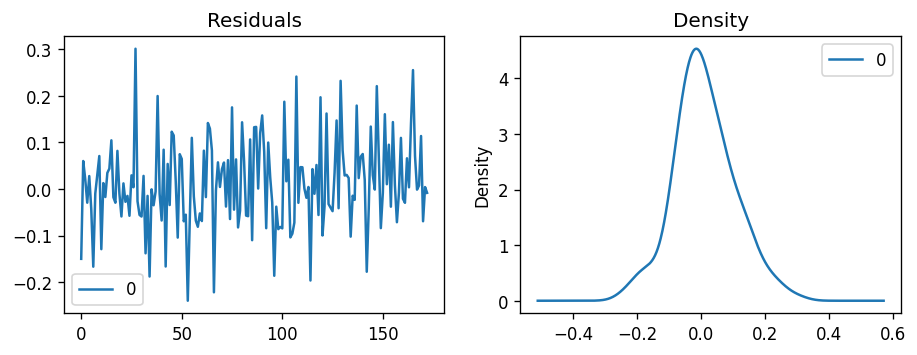

In [ ]:
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})

# Plotting Residual Errors
myresiduals1 = pd.DataFrame(modelfit1.resid)
fig, ax = plt.subplots(1,2)
myresiduals1.plot(title = "Residuals", ax = ax[0])
myresiduals1.plot(kind = 'kde', title = 'Density', ax = ax[1])
plt.show()

In [ ]:
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})

# Plotting Residual Errors
myresiduals2 = pd.DataFrame(modelfit2.resid)
fig, ax = plt.subplots(1,2)
myresiduals2.plot(title = "Residuals", ax = ax[0])
myresiduals2.plot(kind = 'kde', title = 'Density', ax = ax[1])
plt.show()

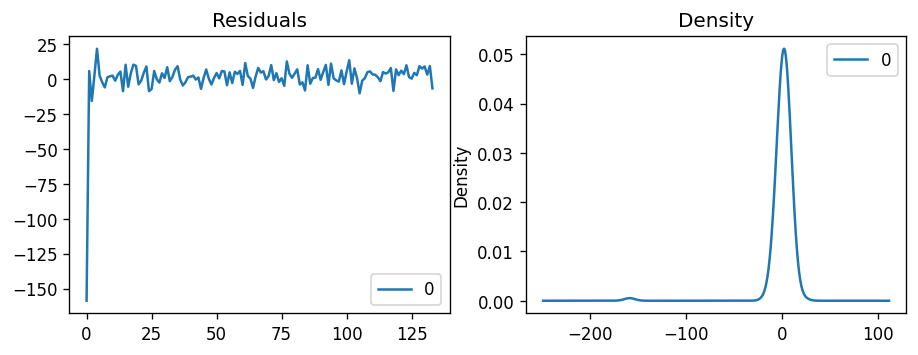

In [ ]:
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})

# Plotting Residual Errors
myresiduals3 = pd.DataFrame(modelfit3.resid)
fig, ax = plt.subplots(1,2)
myresiduals3.plot(title = "Residuals", ax = ax[0])
myresiduals3.plot(kind = 'kde', title = 'Density', ax = ax[1])
plt.show()

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series1 = read_csv("global temp.csv", header=0,usecols=['YEAR', 'TempAnomalies'], index_col=0, squeeze=True)

# split into train and test sets
X = series1.values
size = int(len(X) * 0.51)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test, label="ACTUAL")
pyplot.plot(predictions, color='red', label="PREDICTED")
plt.legend()
pyplot.show()

<ipython-input-31-90fc3330f357>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-31-90fc3330f357>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series1 = read_csv("global temp.csv", header=0,usecols=['YEAR', 'TempAnomalies'], index_col=0, squeeze=True)


predicted=0.031480, expected=-0.020000
predicted=-0.005520, expected=0.060000
predicted=0.047667, expected=0.190000
predicted=0.171543, expected=0.200000
predicted=0.202891, expected=0.050000
predicted=0.078405, expected=0.160000
predicted=0.144076, expected=0.190000
predicted=0.189402, expected=0.130000
predicted=0.144411, expected=-0.060000


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=-0.026813, expected=-0.030000
predicted=-0.033652, expected=-0.050000
predicted=-0.045531, expected=-0.100000
predicted=-0.091133, expected=-0.150000
predicted=-0.141876, expected=0.080000
predicted=0.042261, expected=0.060000
predicted=0.065779, expected=0.060000
predicted=0.062309, expected=-0.070000
predicted=-0.046953, expected=-0.140000
predicted=-0.128808, expected=-0.150000
predicted=-0.148508, expected=0.140000
predicted=0.096589, expected=0.050000
predicted=0.067570, expected=0.030000
predicted=0.035228, expected=0.070000
predicted=0.065461, expected=0.060000
predicted=0.063825, expected=0.030000
predicted=0.036868, expected=0.040000
predicted=0.040181, expected=-0.150000
predicted=-0.117575, expected=-0.050000
predicted=-0.067223, expected=-0.020000
predicted=-0.024111, expected=0.020000
predicted=0.014652, expected=-0.060000
predicted=-0.044829, expected=0.140000
predicted=0.104543, expected=0.000000
predicted=0.030596, expected=-0.060000
predicted=-0.047242, expec

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.375714, expected=0.570000
predicted=0.533456, expected=0.580000
predicted=0.583932, expected=0.420000
predicted=0.455899, expected=0.420000
predicted=0.424518, expected=0.620000
predicted=0.587474, expected=0.590000
predicted=0.601550, expected=0.630000
predicted=0.628338, expected=0.560000
predicted=0.579131, expected=0.700000
predicted=0.678678, expected=0.680000
predicted=0.690313, expected=0.570000


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.597220, expected=0.580000
predicted=0.583492, expected=0.720000


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.698968, expected=0.670000
predicted=0.686064, expected=0.610000
predicted=0.627406, expected=0.690000
predicted=0.680256, expected=0.690000


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.696109, expected=0.810000
predicted=0.793136, expected=1.020000
predicted=0.990818, expected=0.980000
predicted=0.996584, expected=0.890000
predicted=0.913648, expected=0.890000
predicted=0.897578, expected=1.020000
predicted=1.004605, expected=0.920000
predicted=0.946242, expected=0.910000
predicted=0.919202, expected=0.920000
Test RMSE: 0.104


In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series2 = read_csv("global glaciermb.csv", header=0,usecols=['YEAR', 'ANNUAL_BALANCE'], index_col=0, squeeze=True)

# split into train and test sets
X = series2.values
size = int(len(X) * 0.51)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test, label="ACTUAL")
pyplot.plot(predictions, color='red', label="PREDICTED")
plt.legend()
pyplot.show()

<ipython-input-32-5d5205a50d6d>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-32-5d5205a50d6d>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series2 = read_csv("global glaciermb.csv", header=0,usecols=['YEAR', 'ANNUAL_BALANCE'], index_col=0, squeeze=True)


predicted=-406.967028, expected=-218.571429
predicted=-297.057499, expected=-173.485714
predicted=-198.906840, expected=-156.485714
predicted=-166.926118, expected=-124.114286
predicted=-141.527868, expected=19.277778
predicted=-51.321648, expected=-126.789474
predicted=-52.442340, expected=20.000000
predicted=-52.479306, expected=-46.625000
predicted=-11.028887, expected=-381.225000
predicted=-216.400853, expected=-141.048780
predicted=-265.662406, expected=-79.375000
predicted=-110.554880, expected=-472.476190
predicted=-279.444851, expected=-89.318182
predicted=-286.629391, expected=-73.510638
predicted=-81.014788, expected=-424.936170
predicted=-251.860689, expected=-575.191489
predicted=-509.112444, expected=-124.148936
predicted=-355.679951, expected=-450.638298
predicted=-290.741917, expected=-157.840000
predicted=-309.619869, expected=-401.176471
predicted=-282.283415, expected=-562.588235
predicted=-489.425110, expected=-449.923077
predicted=-514.958746, expected=-228.192308
p

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series3 = read_csv("GMSL.csv", header=0,usecols=['YEAR', 'GMSL'], index_col=0, squeeze=True)

# split into train and test sets
X = series3.values
size = int(len(X) * 0.51)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test, label="ACTUAL")
pyplot.plot(predictions, color='red', label="PREDICTED")
plt.legend()
pyplot.show()

<ipython-input-33-f896750a42ff>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-33-f896750a42ff>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series3 = read_csv("GMSL.csv", header=0,usecols=['YEAR', 'GMSL'], index_col=0, squeeze=True)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=-72.128424, expected=-68.200000
predicted=-67.622119, expected=-69.500000
predicted=-67.660154, expected=-67.300000
predicted=-66.201247, expected=-57.800000
predicted=-58.112775, expected=-60.400000
predicted=-58.172046, expected=-56.000000
predicted=-55.277690, expected=-58.900000
predicted=-56.591437, expected=-58.000000
predicted=-56.568328, expected=-63.100000
predicted=-60.416860, expected=-49.700000
predicted=-51.313500, expected=-48.300000
predicted=-46.893681, expected=-48.000000
predicted=-46.348589, expected=-44.300000
predicted=-43.418774, expected=-38.100000
predicted=-37.729314, expected=-43.300000
predicted=-40.288461, expected=-44.900000
predicted=-42.846597, expected=-52.800000
predicted=-49.511139, expected=-41.600000
predicted=-42.670894, expected=-47.000000
predicted=-43.954787, expected=-45.600000
predicted=-44.338674, expected=-44.800000
predicted=-43.390195, expected=-38.000000
predicted=-38.071434, expected=-39.900000
predicted=-37.744297, expected=-34

LSTM

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

# create input and output sequences
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# load the dataset
dataset1 = pd.read_csv("global temp.csv", usecols=['YEAR', 'TempAnomalies'], parse_dates=['YEAR'], index_col='YEAR')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1)

# split into train and test sets
train_size = int(len(dataset1) * 0.51)
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset1),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert the predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Epoch 1/100
85/85 - 5s - loss: 0.0098 - 5s/epoch - 61ms/step
Epoch 2/100
85/85 - 0s - loss: 0.0046 - 168ms/epoch - 2ms/step
Epoch 3/100
85/85 - 0s - loss: 0.0046 - 166ms/epoch - 2ms/step
Epoch 4/100
85/85 - 0s - loss: 0.0047 - 225ms/epoch - 3ms/step
Epoch 5/100
85/85 - 0s - loss: 0.0046 - 242ms/epoch - 3ms/step
Epoch 6/100
85/85 - 0s - loss: 0.0045 - 230ms/epoch - 3ms/step
Epoch 7/100
85/85 - 0s - loss: 0.0046 - 296ms/epoch - 3ms/step
Epoch 8/100
85/85 - 0s - loss: 0.0046 - 269ms/epoch - 3ms/step
Epoch 9/100
85/85 - 0s - loss: 0.0046 - 290ms/epoch - 3ms/step
Epoch 10/100
85/85 - 0s - loss: 0.0045 - 257ms/epoch - 3ms/step
Epoch 11/100
85/85 - 0s - loss: 0.0045 - 249ms/epoch - 3ms/step
Epoch 12/100
85/85 - 0s - loss: 0.0046 - 248ms/epoch - 3ms/step
Epoch 13/100
85/85 - 0s - loss: 0.0045 - 236ms/epoch - 3ms/step
Epoch 14/100
85/85 - 0s - loss: 0.0045 - 353ms/epoch - 4ms/step
Epoch 15/100
85/85 - 0s - loss: 0.0044 - 427ms/epoch - 5ms/step
Epoch 16/100
85/85 - 1s - loss: 0.0046 - 528ms/epoc

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

# create input and output sequences
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# load the dataset
dataset2 = pd.read_csv("global glaciermb.csv", usecols=['YEAR', 'ANNUAL_BALANCE'], parse_dates=['YEAR'], index_col='YEAR')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset2 = scaler.fit_transform(dataset2)

# split into train and test sets
train_size = int(len(dataset2) * 0.51)
test_size = len(dataset2) - train_size
train, test = dataset2[0:train_size,:], dataset2[train_size:len(dataset2),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert the predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Epoch 1/100
49/49 - 2s - loss: 0.7420 - 2s/epoch - 39ms/step
Epoch 2/100
49/49 - 0s - loss: 0.5027 - 102ms/epoch - 2ms/step
Epoch 3/100
49/49 - 0s - loss: 0.3287 - 102ms/epoch - 2ms/step
Epoch 4/100
49/49 - 0s - loss: 0.1925 - 92ms/epoch - 2ms/step
Epoch 5/100
49/49 - 0s - loss: 0.0989 - 97ms/epoch - 2ms/step
Epoch 6/100
49/49 - 0s - loss: 0.0499 - 106ms/epoch - 2ms/step
Epoch 7/100
49/49 - 0s - loss: 0.0353 - 97ms/epoch - 2ms/step
Epoch 8/100
49/49 - 0s - loss: 0.0331 - 107ms/epoch - 2ms/step
Epoch 9/100
49/49 - 0s - loss: 0.0331 - 149ms/epoch - 3ms/step
Epoch 10/100
49/49 - 0s - loss: 0.0331 - 140ms/epoch - 3ms/step
Epoch 11/100
49/49 - 0s - loss: 0.0333 - 165ms/epoch - 3ms/step
Epoch 12/100
49/49 - 0s - loss: 0.0330 - 148ms/epoch - 3ms/step
Epoch 13/100
49/49 - 0s - loss: 0.0331 - 146ms/epoch - 3ms/step
Epoch 14/100
49/49 - 0s - loss: 0.0328 - 181ms/epoch - 4ms/step
Epoch 15/100
49/49 - 0s - loss: 0.0332 - 172ms/epoch - 4ms/step
Epoch 16/100
49/49 - 0s - loss: 0.0331 - 136ms/epoch -

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

# create input and output sequences
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# load the dataset
dataset3 = pd.read_csv("GMSL.csv", usecols=['YEAR', 'GMSL'], parse_dates=['YEAR'], index_col='YEAR')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset3 = scaler.fit_transform(dataset3)

# split into train and test sets
train_size = int(len(dataset3) * 0.51)
test_size = len(dataset3) - train_size
train, test = dataset3[0:train_size,:], dataset3[train_size:len(dataset3),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert the predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Epoch 1/100
65/65 - 2s - loss: 0.0363 - 2s/epoch - 29ms/step
Epoch 2/100
65/65 - 0s - loss: 0.0093 - 130ms/epoch - 2ms/step
Epoch 3/100
65/65 - 0s - loss: 0.0055 - 129ms/epoch - 2ms/step
Epoch 4/100
65/65 - 0s - loss: 0.0047 - 126ms/epoch - 2ms/step
Epoch 5/100
65/65 - 0s - loss: 0.0041 - 140ms/epoch - 2ms/step
Epoch 6/100
65/65 - 0s - loss: 0.0036 - 140ms/epoch - 2ms/step
Epoch 7/100
65/65 - 0s - loss: 0.0030 - 126ms/epoch - 2ms/step
Epoch 8/100
65/65 - 0s - loss: 0.0025 - 136ms/epoch - 2ms/step
Epoch 9/100
65/65 - 0s - loss: 0.0020 - 155ms/epoch - 2ms/step
Epoch 10/100
65/65 - 0s - loss: 0.0016 - 127ms/epoch - 2ms/step
Epoch 11/100
65/65 - 0s - loss: 0.0013 - 173ms/epoch - 3ms/step
Epoch 12/100
65/65 - 0s - loss: 0.0011 - 140ms/epoch - 2ms/step
Epoch 13/100
65/65 - 0s - loss: 8.5733e-04 - 133ms/epoch - 2ms/step
Epoch 14/100
65/65 - 0s - loss: 7.7240e-04 - 121ms/epoch - 2ms/step
Epoch 15/100
65/65 - 0s - loss: 6.5308e-04 - 136ms/epoch - 2ms/step
Epoch 16/100
65/65 - 0s - loss: 6.4245e

VAR

In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR

# load data
data1 = pd.read_csv("global temp.csv", usecols=['YEAR', 'TempAnomalies'])

# create VAR model with 2 lags
model = VAR(data1[['YEAR', 'TempAnomalies']])
results = model.fit(10)

# predict next 10 periods
predictions = results.forecast(data1.values[-10:], steps=10)

# print predictions
print(predictions)

[[2.02400000e+03 9.71070804e-01]
 [2.02500000e+03 9.74081981e-01]
 [2.02600000e+03 1.02278019e+00]
 [2.02700000e+03 1.03663266e+00]
 [2.02800000e+03 1.05848445e+00]
 [2.02900000e+03 1.05913218e+00]
 [2.03000000e+03 1.09007773e+00]
 [2.03100000e+03 1.09805619e+00]
 [2.03200000e+03 1.11503513e+00]
 [2.03300000e+03 1.12610598e+00]]


In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR

# load data
data2 = pd.read_csv("global glaciermb.csv", usecols=['YEAR', 'ANNUAL_BALANCE'])

# create VAR model with 2 lags
model = VAR(data2[['YEAR', 'ANNUAL_BALANCE']])
results = model.fit(10)

# predict next 10 periods
predictions = results.forecast(data2.values[-10:], steps=10)

# print predictions
print(predictions)

[[2022.         -928.31880756]
 [2023.         -946.39148845]
 [2024.         -834.66809641]
 [2025.         -836.64811893]
 [2026.         -951.10511869]
 [2027.         -945.12654451]
 [2028.         -856.73660517]
 [2029.         -889.09019218]
 [2030.         -917.17265794]
 [2031.         -927.6894511 ]]


In [ ]:
import pandas as pd
from statsmodels.tsa.api import VAR

# load data
data3 = pd.read_csv("GMSL.csv", usecols=['YEAR', 'GMSL'])

# create VAR model with 2 lags
model = VAR(data3[['YEAR', 'GMSL']])
results = model.fit(10)

# predict next 10 periods
predictions = results.forecast(data3.values[-10:], steps=10)

# print predictions
print(predictions)

[[2014.           72.48469047]
 [2015.           74.462979  ]
 [2016.           78.14568003]
 [2017.           80.45651373]
 [2018.           85.19272937]
 [2019.           87.75875813]
 [2020.           90.56038363]
 [2021.           93.63759048]
 [2022.           95.12389942]
 [2023.           98.33407473]]


LAND SUBMERGE ANALYSIS

In [ ]:
import pandas as pd
data=pd.read_csv("/dataset.csv")
data.head()

S.No      Country Continent LandArea Coastal_length  Year   sea level  \
0     1  afghanistan      Asia  652,860              0  1880 -174.320729   
1     2  afghanistan      Asia  652,860              0  1890 -162.654063   
2     3  afghanistan      Asia  652,860              0  1900 -150.394062   
3     4  afghanistan      Asia  652,860              0  1910 -138.367396   
4     5  afghanistan      Asia  652,860              0  1920 -130.934063   

   Temperaturecountrywise  Land Impact(m/decade)  
0               12.293500                    0.0  
1               13.757808                    0.0  
2               13.708317                    0.0  
3               13.881050                    0.0  
4               13.716350                    0.0

In [ ]:
data.describe()

S.No       Year    sea level  Temperaturecountrywise  \
count  2820.000000  2820.0000  2820.000000             2727.000000   
mean   1448.558511  1950.0000   -72.893169               18.976461   
std     838.718698    43.2126    74.380559                8.268181   
min       1.000000  1880.0000  -174.320729               -7.903357   
25%     720.750000  1910.0000  -138.367396               11.430828   
50%    1440.500000  1950.0000   -80.700729               22.566000   
75%    2175.250000  1990.0000   -14.790729               25.965183   
max    2910.000000  2020.0000    66.704325               29.807551   

       Land Impact(m/decade)  
count            2820.000000  
mean             1369.276358  
std              8872.201872  
min                -9.918200  
25%                 0.000000  
50%                 7.517000  
75%                41.237850  
max             94117.990000

In [ ]:
data['Coastal_length'] = data['Coastal_length'].str.replace(' km', '')
data['Coastal_length'] = data['Coastal_length'].str.replace('K', '000')
data['Coastal_length'] = data['Coastal_length'].str.replace('k', '000')
data['Coastal_length'] = data['Coastal_length'].str.replace(',', '')
data['Coastal_length'] = data['Coastal_length'].str.replace('.', '').astype("int")

<ipython-input-5-b847ce70fc39>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Coastal_length'] = data['Coastal_length'].str.replace('.', '').astype("int")


In [ ]:
data['LandArea']=data['LandArea'].str.replace(",","").astype("int")

In [ ]:
data.isnull().sum()

S.No                       0
Country                    0
Continent                  0
LandArea                   0
Coastal_length             0
Year                       0
sea level                  0
Temperaturecountrywise    93
Land Impact(m/decade)      0
dtype: int64

In [ ]:
data.dtypes

S.No                        int64
Country                    object
Continent                  object
LandArea                    int64
Coastal_length              int64
Year                        int64
sea level                 float64
Temperaturecountrywise    float64
Land Impact(m/decade)     float64
dtype: object

In [ ]:
glacier=pd.read_csv("/content/global glaciermb.csv")
glacier

YEAR  ANNUAL_BALANCE          ELA        AAR
0    1919     -211.000000  2785.000000  45.000000
1    1920       33.000000  2705.000000  64.000000
2    1921    -2354.000000  3065.000000   0.000000
3    1922       74.000000  2695.000000  67.000000
4    1923     -149.000000  2755.000000  51.000000
..    ...             ...          ...        ...
98   2017     -941.836735  1804.163265  29.975000
99   2018    -1215.183673  2063.122449  22.024390
100  2019    -1167.880000  2037.360000  23.300000
101  2020     -656.775510  2067.530612  32.300000
102  2021     -872.500000  1628.789474  26.857143

[103 rows x 4 columns]

In [ ]:
bins = [i for i in range(1910,2031,10)]
labels = [i for i in range(1910,2021,10)]
glacier['YEAR'] = pd.cut(glacier['YEAR'], bins=bins, labels=labels)
print(glacier)

     YEAR  ANNUAL_BALANCE          ELA        AAR
0    1910     -211.000000  2785.000000  45.000000
1    1910       33.000000  2705.000000  64.000000
2    1920    -2354.000000  3065.000000   0.000000
3    1920       74.000000  2695.000000  67.000000
4    1920     -149.000000  2755.000000  51.000000
..    ...             ...          ...        ...
98   2010     -941.836735  1804.163265  29.975000
99   2010    -1215.183673  2063.122449  22.024390
100  2010    -1167.880000  2037.360000  23.300000
101  2010     -656.775510  2067.530612  32.300000
102  2020     -872.500000  1628.789474  26.857143

[103 rows x 4 columns]


In [ ]:
glacier=glacier.groupby('YEAR').mean()
glacier

ANNUAL_BALANCE          ELA        AAR
YEAR                                        
1910      -89.000000  2745.000000  54.500000
1920     -433.900000  2810.000000  43.400000
1930      -47.500000  2741.000000  55.600000
1940     -528.533333  2194.350000  42.600000
1950     -342.568355  1698.798098  48.989704
1960     -120.785417  1885.132292  55.357894
1970     -132.906762  1891.871379  52.735667
1980     -284.861137  1900.042163  48.647912
1990     -439.661852  1984.838855  44.837282
2000     -769.887645  2082.736484  34.629213
2010     -923.870581  1959.070300  29.107210
2020     -872.500000  1628.789474  26.857143

In [ ]:
data=data.rename(columns={'Year':'YEAR'})

In [ ]:
new_data = pd.merge(data,glacier, on='YEAR', how='left')

In [ ]:
new_data

S.No      Country Continent  LandArea  Coastal_length  YEAR   sea level  \
0        1  afghanistan      Asia    652860               0  1880 -174.320729   
1        2  afghanistan      Asia    652860               0  1890 -162.654063   
2        3  afghanistan      Asia    652860               0  1900 -150.394062   
3        4  afghanistan      Asia    652860               0  1910 -138.367396   
4        5  afghanistan      Asia    652860               0  1920 -130.934063   
...    ...          ...       ...       ...             ...   ...         ...   
2815  2906     zimbabwe    Africa    386850               0  1980  -30.914062   
2816  2907     zimbabwe    Africa    386850               0  1990  -14.790729   
2817  2908     zimbabwe    Africa    386850               0  2000   14.662604   
2818  2909     zimbabwe    Africa    386850               0  2010   48.960947   
2819  2910     zimbabwe    Africa    386850               0  2020   66.704325   

      Temperaturecountrywise  Land Impact(m/decade)  ANNUAL_BALANCE  \
0                  12.293500                    0.0             NaN   
1                  13.757808                    0.0             NaN   
2                  13.708317                    0.0             NaN   
3                  13.881050                    0.0      -89.000000   
4                  13.716350                    0.0     -433.900000   
...                      ...                    ...             ...   
2815               21.804792                    0.0     -284.861137   
2816               21.786892                    0.0     -439.661852   
2817               21.852425                    0.0     -769.887645   
2818               21.908262                    0.0     -923.870581   
2819               21.982873                    0.0     -872.500000   

              ELA        AAR  
0             NaN        NaN  
1             NaN        NaN  
2             NaN        NaN  
3     2745.000000  54.500000  
4     2810.000000  43.400000  
...           ...        ...  
2815  1900.042163  48.647912  
2816  1984.838855  44.837282  
2817  2082.736484  34.629213  
2818  1959.070300  29.107210  
2819  1628.789474  26.857143  

[2820 rows x 12 columns]

In [ ]:
new_data=new_data.drop(['ELA','AAR'], axis=1)

In [ ]:
new_data.columns

Index(['S.No', 'Country', 'Continent', 'LandArea', 'Coastal_length', 'YEAR',
       'sea level', 'Temperaturecountrywise', 'Land Impact(m/decade)',
       'ANNUAL_BALANCE'],
      dtype='object')

In [ ]:
new_data = new_data.reindex(columns=['S.No', 'Country', 'Continent', 'LandArea', 'Coastal_length', 'YEAR', 'Temperaturecountrywise','ANNUAL_BALANCE','sea level', 'Land Impact(m/decade)'])

In [ ]:
new_data

S.No      Country Continent  LandArea  Coastal_length  YEAR  \
0        1  afghanistan      Asia    652860               0  1880   
1        2  afghanistan      Asia    652860               0  1890   
2        3  afghanistan      Asia    652860               0  1900   
3        4  afghanistan      Asia    652860               0  1910   
4        5  afghanistan      Asia    652860               0  1920   
...    ...          ...       ...       ...             ...   ...   
2815  2906     zimbabwe    Africa    386850               0  1980   
2816  2907     zimbabwe    Africa    386850               0  1990   
2817  2908     zimbabwe    Africa    386850               0  2000   
2818  2909     zimbabwe    Africa    386850               0  2010   
2819  2910     zimbabwe    Africa    386850               0  2020   

      Temperaturecountrywise  ANNUAL_BALANCE   sea level  \
0                  12.293500             NaN -174.320729   
1                  13.757808             NaN -162.654063   
2                  13.708317             NaN -150.394062   
3                  13.881050      -89.000000 -138.367396   
4                  13.716350     -433.900000 -130.934063   
...                      ...             ...         ...   
2815               21.804792     -284.861137  -30.914062   
2816               21.786892     -439.661852  -14.790729   
2817               21.852425     -769.887645   14.662604   
2818               21.908262     -923.870581   48.960947   
2819               21.982873     -872.500000   66.704325   

      Land Impact(m/decade)  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
...                     ...  
2815                    0.0  
2816                    0.0  
2817                    0.0  
2818                    0.0  
2819                    0.0  

[2820 rows x 10 columns]

In [ ]:
new_data.to_csv("land submerged.csv",index=False)

In [ ]:
from google.colab import files
files.view('land submerged.csv')


<IPython.core.display.Javascript object>

In [ ]:
ls_data=pd.read_csv("/land submerged.csv")

In [ ]:
ls_data[ls_data.isnull().any(axis=1)]

S.No   Country      Continent  LandArea  Coastal_length  YEAR  \
1064  1095     haiti  North America     27560            2000  2020   
1065  1096  holy see         Europe         0               0  1880   
1066  1097  holy see         Europe         0               0  1890   
1067  1098  holy see         Europe         0               0  1900   
1068  1099  holy see         Europe         0               0  1910   
...    ...       ...            ...       ...             ...   ...   
2635  2711    tuvalu      Australia        30              34  1980   
2636  2712    tuvalu      Australia        30              35  1990   
2637  2713    tuvalu      Australia        30              36  2000   
2638  2714    tuvalu      Australia        30              37  2010   
2639  2715    tuvalu      Australia        30              38  2020   

      Temperaturecountrywise  ANNUAL_BALANCE   sea level  \
1064                     NaN     -872.500000   66.704325   
1065                     NaN        0.000000 -174.320729   
1066                     NaN        0.000000 -162.654063   
1067                     NaN        0.000000 -150.394062   
1068                     NaN      -89.000000 -138.367396   
...                      ...             ...         ...   
2635                     NaN     -284.861137  -30.914062   
2636                     NaN     -439.661852  -14.790729   
2637                     NaN     -769.887645   14.662604   
2638                     NaN     -923.870581   48.960947   
2639                     NaN     -872.500000   66.704325   

      Land Impact(m/decade)  
1064              268.00500  
1065                0.00000  
1066                0.00000  
1067                0.00000  
1068                0.00000  
...                     ...  
2635                4.19293  
2636                5.92390  
2637                5.92981  
2638                6.18238  
2639                6.27283  

[93 rows x 10 columns]

In [ ]:
ls_data=pd.read_csv("/land submerged.csv")
ls_data.isnull().sum()

S.No                        0
Country                     0
Continent                   0
LandArea                    0
Coastal_length              0
YEAR                        0
Temperaturecountrywise      0
ANNUAL_BALANCE            564
sea level                   0
Land Impact(m/decade)       0
dtype: int64

In [ ]:
ls_data['ANNUAL_BALANCE']=ls_data['ANNUAL_BALANCE'].fillna(0)
ls_data.isnull().sum()

S.No                      0
Country                   0
Continent                 0
LandArea                  0
Coastal_length            0
YEAR                      0
Temperaturecountrywise    0
ANNUAL_BALANCE            0
sea level                 0
Land Impact(m/decade)     0
dtype: int64

In [ ]:
ls_data.to_csv("land submerged.csv",index=False)

In [ ]:
from google.colab import files
files.view('land submerged.csv')

<IPython.core.display.Javascript object>

In [ ]:
ls=pd.read_csv("/land submerged.csv")
ls.head()

S.No      Country Continent  LandArea  Coastal_length  YEAR  \
0     1  afghanistan      Asia    652860               0  1880   
1     2  afghanistan      Asia    652860               0  1890   
2     3  afghanistan      Asia    652860               0  1900   
3     4  afghanistan      Asia    652860               0  1910   
4     5  afghanistan      Asia    652860               0  1920   

   Temperaturecountrywise  ANNUAL_BALANCE   sea level  Land Impact(m/decade)  
0               12.293500             0.0 -174.320729                    0.0  
1               13.757808             0.0 -162.654063                    0.0  
2               13.708317             0.0 -150.394062                    0.0  
3               13.881050           -89.0 -138.367396                    0.0  
4               13.716350          -433.9 -130.934063                    0.0

In [ ]:
ls.isnull().sum()

S.No                      0
Country                   0
Continent                 0
LandArea                  0
Coastal_length            0
YEAR                      0
Temperaturecountrywise    0
ANNUAL_BALANCE            0
sea level                 0
Land Impact(m/decade)     0
dtype: int64

In [ ]:
ls.dtypes

S.No                        int64
Country                    object
Continent                  object
LandArea                    int64
Coastal_length              int64
YEAR                        int64
Temperaturecountrywise    float64
ANNUAL_BALANCE            float64
sea level                 float64
Land Impact(m/decade)     float64
dtype: object

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
country_name=input("Enter country name : ")

Enter country name : norway


In [ ]:
df=ls[ls['Country']==country_name]
df

S.No Country Continent  LandArea  Coastal_length  YEAR  \
1875  1936  norway    Europe    365268          532000  1880   
1876  1937  norway    Europe    365268          532000  1890   
1877  1938  norway    Europe    365268          532000  1900   
1878  1939  norway    Europe    365268          532000  1910   
1879  1940  norway    Europe    365268          532000  1920   
1880  1941  norway    Europe    365268          532000  1930   
1881  1942  norway    Europe    365268          532000  1940   
1882  1943  norway    Europe    365268          532000  1950   
1883  1944  norway    Europe    365268          532000  1960   
1884  1945  norway    Europe    365268          532000  1970   
1885  1946  norway    Europe    365268          532000  1980   
1886  1947  norway    Europe    365268          532000  1990   
1887  1948  norway    Europe    365268          532000  2000   
1888  1949  norway    Europe    365268          532000  2010   
1889  1950  norway    Europe    365268          532000  2020   

      Temperaturecountrywise  ANNUAL_BALANCE   sea level  \
1875                0.052317        0.000000 -174.320729   
1876               -0.167933        0.000000 -162.654063   
1877               -0.081325        0.000000 -150.394062   
1878               -0.008750      -89.000000 -138.367396   
1879                0.156750     -433.900000 -130.934063   
1880                0.870917      -47.500000 -120.800729   
1881                0.564900     -528.533333 -102.664062   
1882                0.534175     -342.568355  -80.700729   
1883               -0.190050     -120.785417  -67.524062   
1884                0.354467     -132.906762  -49.660729   
1885                0.566025     -284.861137  -30.914062   
1886                0.845108     -439.661852  -14.790729   
1887                0.979685     -769.887645   14.662604   
1888                1.920373     -923.870581   48.960947   
1889                2.700000     -872.500000   66.704325   

      Land Impact(m/decade)  
1875               0.005200  
1876               0.005420  
1877               0.005450  
1878               0.006200  
1879               0.005984  
1880               0.006178  
1881               0.006123  
1882               0.006320  
1883               0.006412  
1884               0.072290  
1885               0.078290  
1886               0.083920  
1887               0.091890  
1888               0.106200  
1889               0.124930

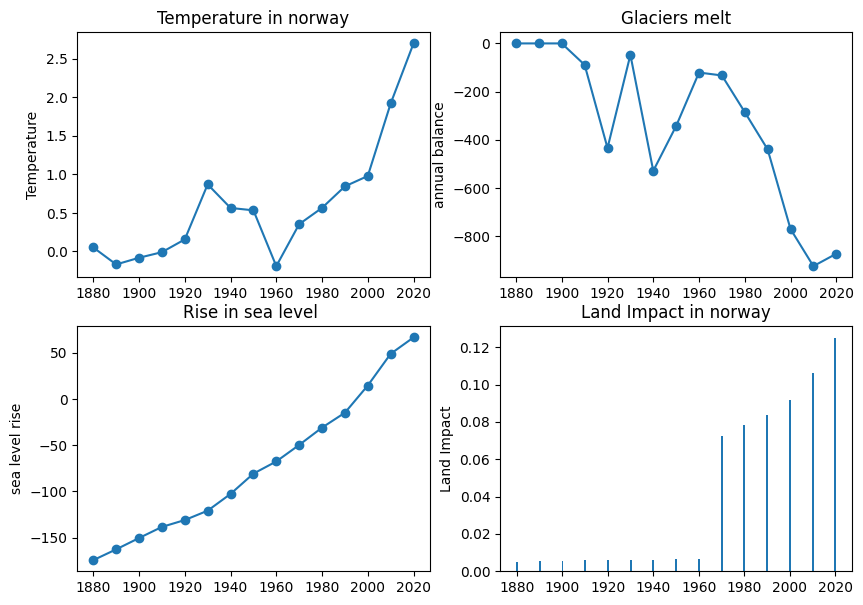

In [ ]:
plt.figure(figsize=(10,7))

plt.subplot(2, 2, 1)
plt.plot(df['YEAR'],df['Temperaturecountrywise'],marker='o')
plt.ylabel('Temperature')
plt.title('Temperature in '+country_name)

plt.subplot(2, 2, 2)
plt.plot(df['YEAR'],df['ANNUAL_BALANCE'],marker='o')
plt.ylabel('annual balance')
plt.title('Glaciers melt')

plt.subplot(2, 2, 3)
plt.plot(df['YEAR'],df['sea level'],marker='o')
plt.ylabel('sea level rise')
plt.title('Rise in sea level ')

plt.subplot(2, 2, 4)
plt.bar(df['YEAR'],df['Land Impact(m/decade)'])
plt.ylabel('Land Impact')
plt.title('Land Impact in '+country_name)

plt.show()

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = ls.values
size = int(len(X) * 0.51)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test, label="ACTUAL")
pyplot.plot(predictions, color='red', label="PREDICTED")
plt.legend()
pyplot.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df = pd.read_csv('C:\\Users\\ragia\\OneDrive\\Desktop\\dsr datasets\\dsrdataset.csv')
df

In [ ]:
df['date'] = pd.to_datetime(df['Year'].astype(str), format='%Y')  # convert year column to datetime
df = df.set_index('date')  # set date column as index

In [ ]:
df = df.drop(['LandAverageTemperatureUncertainty','LandMaxTemperature','LandMaxTemperatureUncertainty','LandMinTemperature','LandMinTemperatureUncerainty','GMSLUncertainty'],axis=1)
print(df)

In [ ]:
corr = df[['LandAverageTemperature', 'GMSL']].corr().iloc[0, 1]
print(f"Correlation coefficient: {corr:.2f}")


In [ ]:
model = ARIMA(df['GMSL'], order=(1, 0, 1), exog=df[['LandAverageTemperature']])
results = model.fit()

In [ ]:
start_index = '1881'
end_index = '1979'
pred = results.predict(start=start_index, end=end_index, exog=df.loc[start_index:end_index, ['LandAverageTemperature']])


In [ ]:
pred

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(actual, color='blue', label='Actual')
ax.plot( pred, color='orange', label='Predicted')
# ax.hist(actual, bins=20, alpha=0.5, label='Actual')
# ax.hist(pred.values, bins=20, alpha=0.5, label='Predicted')
ax.legend()
ax.set_title('Actual vs Predicted GMSL')
ax.set_xlabel('Year')
ax.set_ylabel('GMSL (mm)')
plt.show()

Temperature vs Glaciers Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df = pd.read_csv("C:\\Users\\ragia\\Downloads\\temp_vs_glaciermb.csv")
df

In [ ]:
df['date'] = pd.to_datetime(df['YEAR'].astype(str), format='%Y')  # convert year column to datetime
df = df.set_index('date')

In [ ]:
df = df.drop(['LandTempAaomalies','OceanTempAnomalies','ELA','AAR'],axis=1)
print(df)

In [ ]:
corr = df[['TempAnomalies', 'ANNUAL_BALANCE']].corr().iloc[0, 1]
print(f"Correlation coefficient: {corr:.2f}")

In [ ]:
model = ARIMA(df['ANNUAL_BALANCE'], order=(0, 0, 0), exog=df[['TempAnomalies']])
results = model.fit()

In [ ]:
fig, ax = plt.subplots()
ax.plot(df.index, results.resid)
ax.set_title('Residuals')
plt.show()

In [ ]:
train_size = 0.7
train, test = train_test_split(df, train_size=train_size, shuffle=False)

In [ ]:
start_index = '1920'
end_index = '2000'
pred = results.predict(start=start_index, end=end_index, exog=df.loc[start_index:end_index, ['TempAnomalies']])
pred

In [ ]:
actual = df['ANNUAL_BALANCE'][1:82]
actual

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(pred, color='blue', label='pred')
ax.plot(actual, color='green', label='Actual')
ax.legend()
ax.set_title('Actual vs Predicted annual balance')
ax.set_xlabel('Year')
ax.set_ylabel('Annual balance (mm)')
plt.show()

In [ ]:
#glaciers vs sea level

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
df = pd.read_csv("C:\\Users\\ragia\\Downloads\\glaciermb_vs_slr.csv")
# df

In [ ]:
df = df.drop(['GMSLUncertainty','ELA','AAR'],axis=1)
# print(df)

In [ ]:
df = df.set_index('YEAR')
# df

In [ ]:
train_size = int(len(df) * 0.7)
train, test = df.iloc[:train_size], df.iloc[train_size:]


In [ ]:
model = ARIMA(train['ANNUAL_BALANCE'], exog=train['GMSL'], order=(2, 0, 1))
results = model.fit()


In [ ]:
preds = results.forecast(steps=len(test), exog=test['ANNUAL_BALANCE'])
actual=test['ANNUAL_BALANCE']

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['ANNUAL_BALANCE'], color='blue', label='Actual')
ax.plot(test.index, preds, color='orange', label='Predicted')
ax.legend()
ax.set_title('Actual vs Predicted GMSL')
ax.set_xlabel('Year')
ax.set_ylabel('Annual balance (mm)')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
slr = pd.read_csv(r"C:\Users\ADMIN\Downloads\Glacier\analysis\GMSL.csv")
gmb = pd.read_csv(r"C:\Users\ADMIN\Downloads\Glacier\analysis\mass_balance.csv")

In [ ]:
slr.head()

In [ ]:
slr = slr.rename(columns={"Year":"YEAR"})
slr.columns

In [ ]:
slr.dtypes

In [ ]:
gmb.head()

In [ ]:
gmb.columns

In [ ]:
global_gmb = gmb.drop(['PU', 'NAME', 'LATITUDE', 'LONGITUDE'],axis=1)
global_gmb.head()

In [ ]:
global_gmb.dtypes

In [ ]:
global_gmb["YEAR"] = global_gmb["YEAR"].apply(lambda x:x[-4:])
global_gmb["YEAR"]

In [ ]:
global_gmb.isnull().sum()

In [ ]:
global_gmb.dtypes

In [ ]:
l=list(map(str,global_gmb["ELA"]))
for i in range(len(l)):
    if l[i][0]=='<' or l[i][0]=='>':
        l[i]=l[i][1:]
    if l[i]=="nan":
        l[i]=0
global_gmb["ELA"]=l
global_gmb.head()

In [ ]:
global_gmb["ELA"]=global_gmb["ELA"].astype("int64")

In [ ]:
global_gmb.dtypes

In [ ]:
gg=global_gmb.groupby("YEAR").mean()
df=pd.DataFrame(gg)
df

In [ ]:
gg = gg.reset_index()
gg

In [ ]:
gg["YEAR"] = gg["YEAR"].astype("int64")
gg.dtypes

In [ ]:
gg.to_csv("global glaciermb.csv",index=False)

In [ ]:
df = pd.merge(gg,slr,how="left",on="YEAR")
df

In [ ]:
df.isnull().sum()

In [ ]:
df = df.dropna()
df

In [ ]:
df.head(10)

In [ ]:
df.to_csv("glaciermb_vs_slr.csv",index=False)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
temp = pd.read_csv(r"C:\Users\ADMIN\Downloads\Glacier\analysis\global temp.csv")
print(temp)
glacier = pd.read_csv(r"C:\Users\ADMIN\Downloads\Glacier\analysis\global glaciermb.csv")
print(glacier)

In [ ]:
df = pd.merge(temp,glacier,how="right",on="YEAR")
df

In [ ]:
df.to_csv("temp_vs_glaciermb.csv",index=False)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
data = pd.read_csv('/content/land submerged - land submerged (1).csv')
data.columns

Index(['S.No', 'Country', 'Continent', 'LandArea', 'Coastal_length', 'YEAR',
       'Temperaturecountrywise', 'ANNUAL_BALANCE', 'sea level',
       'Land Impact(m/decade)'],
      dtype='object')

In [ ]:

data.isnull().sum()

S.No                        0
Country                     0
Continent                   0
LandArea                    0
Coastal_length              0
YEAR                        0
Temperaturecountrywise      0
ANNUAL_BALANCE            564
sea level                   0
Land Impact(m/decade)       0
dtype: int64

In [ ]:
data['ANNUAL_BALANCE']=data['ANNUAL_BALANCE'].fillna(0)

In [ ]:
data.isnull().sum()

S.No                      0
Country                   0
Continent                 0
LandArea                  0
Coastal_length            0
YEAR                      0
Temperaturecountrywise    0
ANNUAL_BALANCE            0
sea level                 0
Land Impact(m/decade)     0
dtype: int64

In [ ]:
countries=data['Country'].unique()
print(len(countries))
print(data.shape)

188
(2820, 10)


**Multi linear regresion**


In [ ]:
ls=pd.DataFrame(columns = ["Country","Score","Coefficients","Intercept","y_test","y_pred","RMSE"])
import matplotlib.pyplot as plt
#defining model
def multilinear_model(country_name,X,y):
  #splittig data
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)

  d={'Country':country_name,
      'Score':model.score(X_test,y_test),
      'Coefficients':model.coef_,
      'Intercept':model.intercept_,
      'y_test':y_test,
      'y_pred':y_pred,
      'RMSE':metrics.mean_squared_error(y_test,y_pred)}
  #Preparing a dataframe
  ls.loc[len(ls)] = d
  return y_pred

predicted_values_list = []
country_labels=[]

#loop for every country
for country_name in countries:
  df=data[data['Country']==country_name]
  X = df[['Temperaturecountrywise', 'ANNUAL_BALANCE', 'sea level']]
  y = df['Land Impact(m/decade)']
  predicted_values = multilinear_model(country_name,X,y)
  predicted_values_list.append(predicted_values)
  country_labels.append(country_name)


#Downloading dataset
ls.to_csv("/content/landimpact.csv")

Graph of multilinear regression


In [ ]:
ls=pd.DataFrame(columns = ["Country","Score","Coefficients","Intercept","y_test","y_pred","RMSE"])
#Importing required packages and libraries
import matplotlib.pyplot as plt
import random
import numpy as np
#Defining model
def multilinear_model(country_name,x_train,x_test,y_train,y_test):
  model = LinearRegression()
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)

  d={'Country':country_name,
      'Score':model.score(x_test,y_test),
      'Coefficients':model.coef_,
      'Intercept':model.intercept_,
      'y_test':y_test,
      'y_pred':y_pred,
      'RMSE':metrics.mean_squared_error(y_test,y_pred)}
  ls.loc[len(ls)] = d
  return y_pred

predicted_values_list = []
country_labels=[]

predicted_values_list = []
country_labels=[]
list_of_countries=[]
#Getting random country for every execution
for country_name in countries:
  list_of_countries.append(country_name)
print(len(list_of_countries))

random_country = random.choice(list_of_countries)

# Getting the input and output data for the random country
df=data[data['Country']==random_country]
X = df[['Temperaturecountrywise', 'ANNUAL_BALANCE', 'sea level']]
y = df['Land Impact(m/decade)']
#Splitting data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.35)
# Call your function to get the predicted values for the random country
predicted_values = multilinear_model(random_country,x_train,x_test,y_train,y_test)

fig, ax = plt.subplots()

bar_height = 0.1
# Using the bar() function to plot the bar plot for the actual values
ax.bar(np.arange(len(y_test)), y_test, width=bar_height, align='center', label='Actual Values')

# Using the barh() function to plot the horizontal bar plot for the predicted values
ax.bar(np.arange(len(predicted_values))+bar_height, predicted_values, width=bar_height, align='center', label='Predicted Values')

# Setting the y-axis ticks and labels
country_labels = list(y_test.index)
ax.set_xticks(np.arange(len(y_test)) + bar_height/2)
ax.set_xticklabels(country_labels)

# Adding the legend and axis labels
ax.legend()
ax.set_xlabel('Index')
ax.set_ylabel('Rate of submergence')
ax.set_title('Actual and Predicted Values of'+" "+random_country)

# Show the plot
plt.show()



# ls.to_csv("/content/landimpact.csv")

188


**POLYNOMIAL REGRESSION**

polynomial regression dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


ls=pd.DataFrame(columns = ["Country","Score","Coefficients","Intercept","y_test","y_pred","RMSE_train","RMSE_test","R2_train","R2_test"])


from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree,country_name,x,y):
  "Creates a polynomial regression model for the given degree"
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
  # print(y_test)
  poly_features = PolynomialFeatures(degree=degree)

  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(x_train)

  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)

  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)

  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(x_test))

  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)

  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)

  d={'Country':country_name,
      # 'Score':poly_model.score(y_test,y_test),
      'Coefficients':poly_model.coef_,
      'Intercept':poly_model.intercept_,
      'y_test':y_test,
      'y_pred':y_test_predict,
      'RMSE_train':rmse_train,
      'RMSE_test':rmse_test,
      'R2_train':r2_train,
      'R2_test':r2_test}
  ls.loc[len(ls)] = d
  return y_test_predict

predicted_values_list = []
country_labels=[]

for country_name in countries:
  df=data[data['Country']==country_name]
  X = df[['Temperaturecountrywise', 'ANNUAL_BALANCE', 'sea level']]
  y = df['Land Impact(m/decade)']
  predicted_values = create_polynomial_regression_model(2,country_name,X,y)
  predicted_values_list.append(predicted_values)
  country_labels.append(country_name)

ls.to_csv("/content/landimpact_pr.csv")


Polynomial regression graph


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import random

ls=pd.DataFrame(columns = ["Country","Score","Coefficients","Intercept","y_test","y_pred","RMSE_train","RMSE_test","R2_train","R2_test"])


from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree,country_name,x_train,x_test,y_train,y_test):
  "Creates a polynomial regression model for the given degree"

  # print(y_test)
  poly_features = PolynomialFeatures(degree=degree)

  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(x_train)

  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)

  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)

  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(x_test))

  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)

  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)

  d={'Country':country_name,
      # 'Score':poly_model.score(y_test,y_test),
      'Coefficients':poly_model.coef_,
      'Intercept':poly_model.intercept_,
      'y_test':y_test,
      'y_pred':y_test_predict,
      'RMSE_train':rmse_train,
      'RMSE_test':rmse_test,
      'R2_train':r2_train,
      'R2_test':r2_test}
  ls.loc[len(ls)] = d
  return y_test_predict

predicted_values_list = []
country_labels=[]
list_of_countries=[]
for country_name in countries:
  list_of_countries.append(country_name)
print(len(list_of_countries))

random_country = random.choice(list_of_countries)

# Get the input and output data for the random country
df=data[data['Country']==random_country]
X = df[['Temperaturecountrywise', 'ANNUAL_BALANCE', 'sea level']]
y = df['Land Impact(m/decade)']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Call your function to get the predicted values for the random country
predicted_values = create_polynomial_regression_model(2,random_country,x_train,x_test,y_train,y_test)

fig, ax = plt.subplots()

bar_height = 0.3
# Use the bar() function to plot the bar plot for the actual values
ax.bar(np.arange(len(y_test)), y_test, width=bar_height, align='center', label='Actual Values')

# Use the barh() function to plot the horizontal bar plot for the predicted values
ax.bar(np.arange(len(predicted_values))+bar_height, predicted_values, width=bar_height, align='center', label='Predicted Values')

# Set the y-axis ticks and labels
country_labels = list(y_test.index)
ax.set_xticks(np.arange(len(y_test)) + bar_height/2)
ax.set_xticklabels(country_labels)

# Add the legend and axis labels
ax.legend()
ax.set_xlabel('Index')
ax.set_ylabel('Rate of submergence')
ax.set_title('Actual and Predicted Values of'+" "+random_country)

# Show the plot
plt.show()

# ls.to_csv("/content/landimpact_pr.csv")


188


**Random Forest Regressor**

RF regressor graph

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import random

ls=pd.DataFrame(columns = ["Country","Score","Coefficients","Intercept","y_test","y_pred","RMSE_train","RMSE_test","R2_train","R2_test"])


from sklearn.ensemble import RandomForestRegressor

def randomforest_regression_model(country_name,x_train,x_test,y_train,y_test):
  "Creates a polynomial regression model for the given degree"

  # print(y_test)
  regressor = RandomForestRegressor(n_estimators=100, random_state=0)
# fit the regressor with x and y data
  regressor.fit(x_train, y_train)

  y_train_predicted = regressor.predict(x_train)

  y_test_predict = regressor.predict(x_test) # test the output by changing values


  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train)

  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)

  d={'Country':country_name,
      # 'Score':regressor.score(y_test,y_test_predict),
      'y_test':y_test,
      'y_pred':y_test_predict,
      'RMSE_train':rmse_train,
      'RMSE_test':rmse_test,
      'R2_train':r2_train,
      'R2_test':r2_test}
  ls.loc[len(ls)] = d
  return y_test_predict

predicted_values_list = []
country_labels=[]
list_of_countries=[]
for country_name in countries:
  list_of_countries.append(country_name)
print(len(list_of_countries))

# random_country = random.choice(list_of_countries)
random_country = 'syria'
# Get the input and output data for the random country
df=data[data['Country']==random_country]
X = df[['Temperaturecountrywise', 'ANNUAL_BALANCE', 'sea level']]
y = df['Land Impact(m/decade)']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# Call your function to get the predicted values for the random country
predicted_values = randomforest_regression_model(random_country,x_train,x_test,y_train,y_test)
print(y_test)
fig, ax = plt.subplots()

bar_height = 0.3
# Use the bar() function to plot the bar plot for the actual values
ax.bar(np.arange(len(y_test)), y_test, width=bar_height, align='center', label='Actual Values')

# Use the barh() function to plot the horizontal bar plot for the predicted values
ax.bar(np.arange(len(predicted_values))+bar_height, predicted_values, width=bar_height, align='center', label='Predicted Values')

# Set the y-axis ticks and labels
print(len(y_test))
country_labels = list(y_test.index)
ax.set_xticks(np.arange(len(y_test)) + bar_height/2)
ax.set_xticklabels(country_labels)

# Add the legend and axis labels
ax.legend()
ax.set_xlabel('Index')
ax.set_ylabel('Rate of submergence')
ax.set_title('Actual and Predicted Values of'+" "+random_country)

# Show the plot
plt.show()
# ls.to_csv("/content/landimpact_rfr.csv")


188
2471    1.0120
2463    0.4762
2466    0.6260
Name: Land Impact(m/decade), dtype: float64
3


Dataset of Randomforest regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import random

ls=pd.DataFrame(columns = ["Country","Score","Coefficients","Intercept","y_test","y_pred","RMSE_train","RMSE_test","R2_train","R2_test"])


from sklearn.ensemble import RandomForestRegressor

def randomforest_regression_model(country_name,x_train,x_test,y_train,y_test):
  "Creates a polynomial regression model for the given degree"

# print(y_test)
  regressor = RandomForestRegressor(n_estimators=100, random_state=0)
# fit the regressor with x and y data
  regressor.fit(x_train, y_train)

  y_train_predicted = regressor.predict(x_train)

  y_test_predict = regressor.predict(x_test)

  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train)

  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)

  d={'Country':country_name,
      # 'Score':regressor.score(y_test,y_test_predict),
      'y_test':y_test,
      'y_pred':y_test_predict,
      'RMSE_train':rmse_train,
      'RMSE_test':rmse_test,
      'R2_train':r2_train,
      'R2_test':r2_test}
  ls.loc[len(ls)] = d
  return y_test_predict


predicted_values_list = []
country_labels=[]
for country_name in countries:
  df=data[data['Country']==country_name]
  X = df[['Temperaturecountrywise', 'ANNUAL_BALANCE', 'sea level']]
  y = df['Land Impact(m/decade)']
  x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
  predicted_values = randomforest_regression_model(country_name,x_train,x_test,y_train,y_test)
  predicted_values_list.append(predicted_values)
  country_labels.append(country_name)

ls.to_csv("/content/landimpact_rfr.csv")

**Lasso regression**

Lasso regression dataset


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

ls=pd.DataFrame(columns = ["Country","Score","Coefficients","Intercept","y_test","y_pred","RMSE_test","R2_test"])

def lasso_regression_model(country_name,x_train,x_test,y_train,y_test):
  lasso = Lasso(alpha=0.1)
  lasso.fit(x_train, y_train)
  y_pred = lasso.predict(x_test)

  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
  r2_test = r2_score(y_test, y_pred)

  d={'Country':country_name,
      # 'Score':regressor.score(y_test,y_test_predict),
      'y_test':y_test,
      'y_pred':y_pred,
      'RMSE_test':rmse_test,
      'R2_test':r2_test}
  ls.loc[len(ls)] = d
  return y_pred


predicted_values_list = []
country_labels=[]
for country_name in countries:
  df=data[data['Country']==country_name]
  X = df[['Temperaturecountrywise', 'ANNUAL_BALANCE', 'sea level']]
  y = df['Land Impact(m/decade)']
  x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
  predicted_values = lasso_regression_model(country_name,x_train,x_test,y_train,y_test)
  predicted_values_list.append(predicted_values)
  country_labels.append(country_name)

ls.to_csv("/content/landimpact_lr.csv")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso regression graphs


188
1186     3.2930
1197    14.9930
1192     8.1938
Name: Land Impact(m/decade), dtype: float64
3


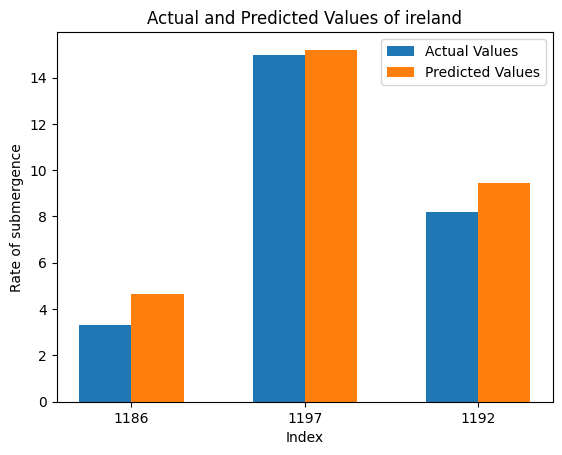

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

ls=pd.DataFrame(columns = ["Country","Score","Coefficients","Intercept","y_test","y_pred","RMSE_test","R2_test"])

def lasso_regression_model(country_name,x_train,x_test,y_train,y_test):
  lasso = Lasso(alpha=0.1)
  lasso.fit(x_train, y_train)
  y_pred = lasso.predict(x_test)

  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
  r2_test = r2_score(y_test, y_pred)

  d={'Country':country_name,
      # 'Score':regressor.score(y_test,y_test_predict),
      'y_test':y_test,
      'y_pred':y_pred,
      'RMSE_test':rmse_test,
      'R2_test':r2_test}
  ls.loc[len(ls)] = d
  return y_pred


predicted_values_list = []
country_labels=[]
list_of_countries=[]
for country_name in countries:
  list_of_countries.append(country_name)
print(len(list_of_countries))

random_country = random.choice(list_of_countries)

df=data[data['Country']==random_country]
X = df[['Temperaturecountrywise', 'ANNUAL_BALANCE', 'sea level']]
y = df['Land Impact(m/decade)']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

predicted_values = lasso_regression_model(random_country,x_train,x_test,y_train,y_test)
print(y_test)
fig, ax = plt.subplots()
bar_height = 0.3
ax.bar(np.arange(len(y_test)), y_test, width=bar_height, align='center', label='Actual Values')
ax.bar(np.arange(len(predicted_values))+bar_height, predicted_values, width=bar_height, align='center', label='Predicted Values')

print(len(y_test))
country_labels = list(y_test.index)
ax.set_xticks(np.arange(len(y_test)) + bar_height/2)
ax.set_xticklabels(country_labels)


ax.legend()
ax.set_xlabel('Index')
ax.set_ylabel('Rate of submergence')
ax.set_title('Actual and Predicted Values of'+" "+random_country)


plt.show()

**Ridge Regression**

Ridge regression dataset

In [ ]:
from sklearn.linear_model import Ridge
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

ls=pd.DataFrame(columns = ["Country","y_test","y_pred","RMSE_test","R2_test"])

def ridge_regression_model(country_name,x_train,x_test,y_train,y_test):
  ridge = Ridge(alpha=1.0)
  ridge.fit(x_train, y_train)

# Make predictions on the test set
  y_pred = ridge.predict(x_test)
  rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
  r2_test = r2_score(y_test, y_pred)

  d={'Country':country_name,
      # 'Score':regressor.score(y_test,y_test_predict),
      'y_test':y_test,
      'y_pred':y_pred,
      'RMSE_test':rmse_test,
      'R2_test':r2_test}
  ls.loc[len(ls)] = d
  return y_pred

predicted_values_list = []
country_labels=[]
for country_name in countries:
  df=data[data['Country']==country_name]
  X = df[['Temperaturecountrywise', 'ANNUAL_BALANCE', 'sea level']]
  y = df['Land Impact(m/decade)']
  x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
  predicted_values = ridge_regression_model(country_name,x_train,x_test,y_train,y_test)
  predicted_values_list.append(predicted_values)
  country_labels.append(country_name)

ls.to_csv("/content/landimpact_rr.csv")



Ridge regression graph

In [ ]:
from sklearn.linear_model import Ridge
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import random
import numpy as np
import matplotlib.pyplot as plt

ls=pd.DataFrame(columns = ["Country","y_test","y_pred","RMSE_test","R2_test"])

def ridge_regression_model(country_name,x_train,x_test,y_train,y_test):
  ridge = Ridge(alpha=1.0)
  ridge.fit(x_train, y_train)

# Make predictions on the test set
  y_pred = ridge.predict(x_test)
  rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
  r2_test = r2_score(y_test, y_pred)

  d={'Country':country_name,
      # 'Score':regressor.score(y_test,y_test_predict),
      'y_test':y_test,
      'y_pred':y_pred,
      'RMSE_test':rmse_test,
      'R2_test':r2_test}
  ls.loc[len(ls)] = d
  return y_pred



predicted_values_list = []
country_labels=[]
list_of_countries=[]
for country_name in countries:
  list_of_countries.append(country_name)
print(len(list_of_countries))

random_country = random.choice(list_of_countries)

df=data[data['Country']==random_country]
X = df[['Temperaturecountrywise', 'ANNUAL_BALANCE', 'sea level']]
y = df['Land Impact(m/decade)']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

predicted_values = ridge_regression_model(random_country,x_train,x_test,y_train,y_test)
print(y_test)
fig, ax = plt.subplots()
bar_height = 0.3
ax.bar(np.arange(len(y_test)), y_test, width=bar_height, align='center', label='Actual Values')
ax.bar(np.arange(len(predicted_values))+bar_height, predicted_values, width=bar_height, align='center', label='Predicted Values')

print(len(y_test))
country_labels = list(y_test.index)
ax.set_xticks(np.arange(len(y_test)) + bar_height/2)
ax.set_xticklabels(country_labels)


ax.legend()
ax.set_xlabel('Index')
ax.set_ylabel('Rate of submergence')
ax.set_title('Actual and Predicted Values of'+" "+random_country)



plt.show()

188
926    5.829
922    5.390
921    4.820
Name: Land Impact(m/decade), dtype: float64
3


**Calculating rate of rate of coastal erosion**

In [ ]:

data['difference'] = None
c=0
for i in range(1, len(data), 15):
    if i+14 < len(data):
      for j in range(i,i+14):
        data['difference'][j]= data.iloc[j]['Land Impact(m/decade)'] - data.iloc[j-1]['Land Impact(m/decade)']



<ipython-input-7-973d1f0cadda>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['difference'][j]= data.iloc[j]['Land Impact(m/decade)'] - data.iloc[j-1]['Land Impact(m/decade)']


In [ ]:
max_value = data['difference'].max()
print(max_value)
min_value = data['difference'].min()
print(min_value)



136.07500000000002
-130.645088


In [ ]:
#Importing necessary libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the data from the CSV files into separate Pandas dataframes
df1 = pd.read_csv('/content/landimpact.csv')
df2 = pd.read_csv('/content/landimpact_pr.csv')
df3 = pd.read_csv('/content/landimpact_rfr.csv')
df4 = pd.read_csv('/content/landimpact_lr.csv')
df5 = pd.read_csv('/content/landimpact_rr.csv')
print(df1.columns)
df1=df1.drop(['Unnamed: 0','Score', 'Coefficients', 'Intercept', 'y_test',
       'y_pred'],axis=1)
df1 = df1.rename(columns={'RMSE':'RMSE_test'})
df2 = df2.drop(['Unnamed: 0','Score', 'Coefficients', 'Intercept', 'y_test',
       'y_pred','RMSE_train',"R2_train",'R2_test'],axis=1)
df3 = df3.drop(['Unnamed: 0','Score', 'Coefficients', 'Intercept', 'y_test',
       'y_pred','RMSE_train',"R2_train",'R2_test'],axis=1)
df4 = df4.drop(['Unnamed: 0','Score', 'Coefficients', 'Intercept', 'y_test',
       'y_pred','R2_test'],axis=1)
df5 = df5.drop(['Unnamed: 0', 'y_test',
       'y_pred','R2_test'],axis=1)
print(df1)
print(df2)
#Merging data
merged_df = pd.merge(df1, df2, on='Country', suffixes=('_model1', '_model2'))
merged_df = pd.merge(merged_df, df3, on='Country')
merged_df = pd.merge(merged_df, df4, on='Country', suffixes=('_model3','_model4'))
merged_df = pd.merge(merged_df, df5, on='Country', suffixes=('_model5', '_model6'))
merged_df = merged_df.rename(columns={"RMSE_test":"RMSE_test_model5"})
#Random country RMSE values comparsion
random_country = np.random.choice(merged_df['Country'])
country_df = merged_df[merged_df['Country'] == random_country]
x = ['Multilinear', 'Polynomial', 'Randomforest', 'Lasso', 'Ridge']
y = [country_df['RMSE_test_model1'].values[0],
     country_df['RMSE_test_model2'].values[0],
     country_df['RMSE_test_model3'].values[0],
     country_df['RMSE_test_model4'].values[0],
     country_df['RMSE_test_model5'].values[0]]

plt.bar(x, y,width=0.1)
plt.xticks(x,rotation=60)

# Setting the axis labels and title
plt.xlabel('Different types of models')
plt.ylabel('RMSE values')
plt.title(f'Comparison of RMSE values for {random_country}')

plt.show()

import seaborn as sns

merged_df.set_index('Country').plot(figsize=(10,6))
Countries = merged_df["Country"].tolist()
# Setting the axis labels and title
plt.xlabel('Country')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE values for different models and countries')

plt.show()





FileNotFoundError: ignored

**CLUSTERING**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-34c380f6b81a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['australia', 'benin', 'brazil', 'cambodia', 'costa rica', "côte d'ivoire", 'france', 'germany', 'ghana', 'greece', 'italy', 'jordan', 'kazakhstan', 'kenya', 'madagascar', 'malaysia', 'montenegro', 'oman', 'panama', 'peru', 'romania', 'russia', 'saint lucia', 'senegal', 'sierra leone', 'spain', 'thailand', 'timor-leste', 'togo', 'tonga', 'turkey']
Countries in Cluster 2:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', '

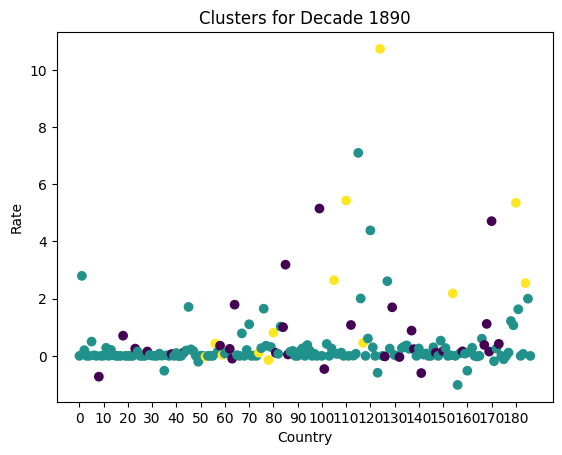

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-34c380f6b81a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'libya', 'liechtenstein', 'lithuania', 'luxembourg', 'malawi', 

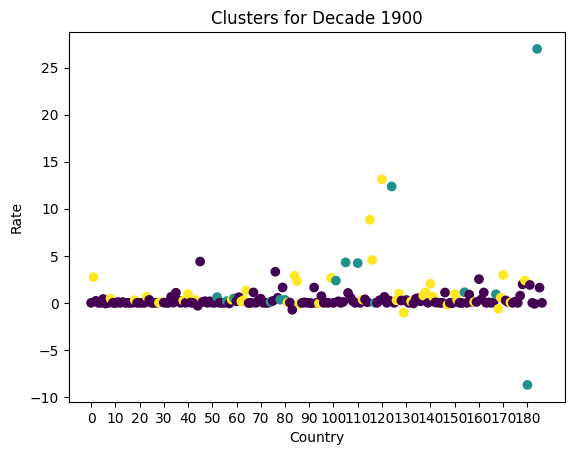

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-34c380f6b81a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithu

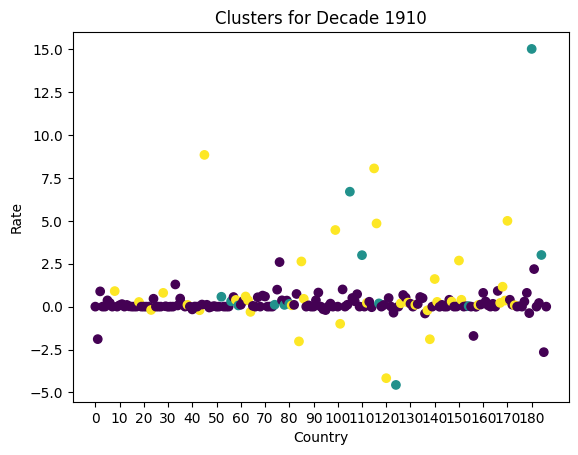

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-34c380f6b81a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithu

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-34c380f6b81a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithuania', 'luxembourg', 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-34c380f6b81a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithuania', 'luxembourg', 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-34c380f6b81a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'france', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'italy', 'jam

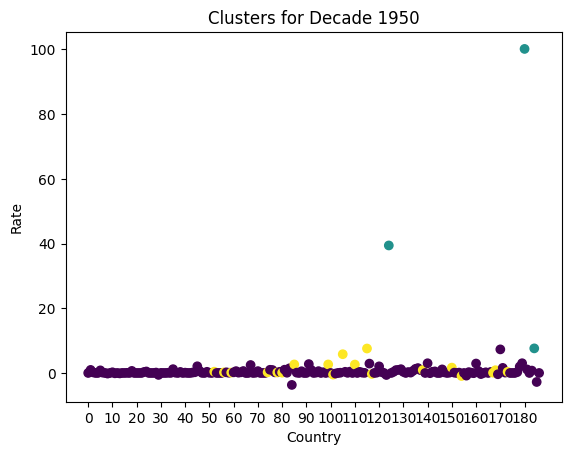

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-34c380f6b81a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithuania', 'luxembourg', 

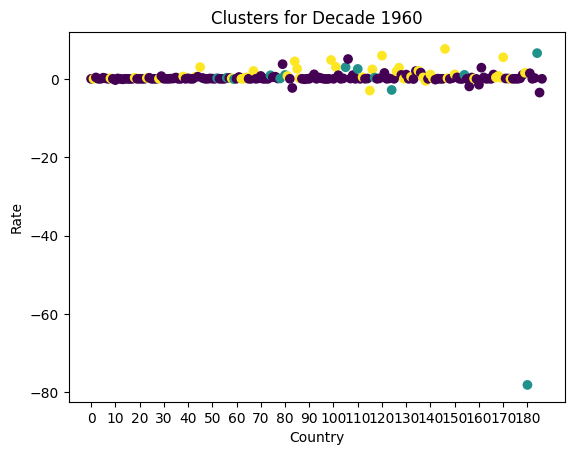

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-34c380f6b81a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'france', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'italy', 'jam

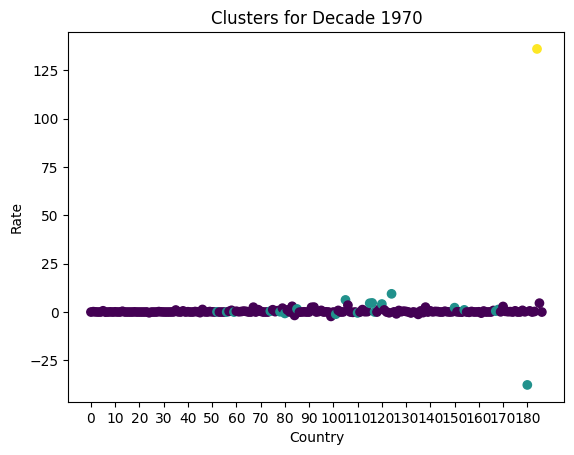

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-34c380f6b81a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'france', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'italy', 'jam

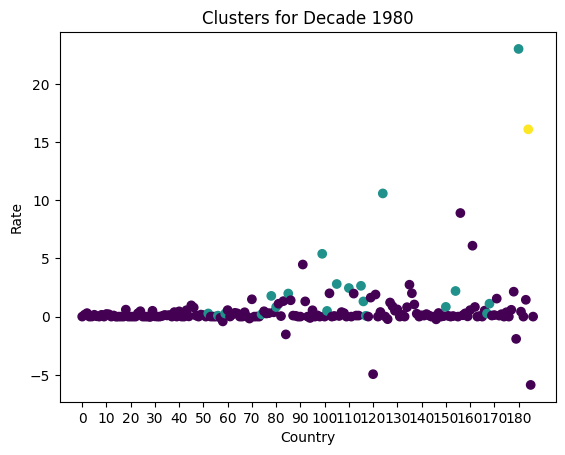

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-34c380f6b81a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'france', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'italy', 'jam

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-34c380f6b81a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'france', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'italy', 'jam

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-34c380f6b81a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'france', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'italy', 'jam

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-10-34c380f6b81a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['equatorial guinea', 'fiji', 'gabon', 'iceland', 'iraq', 'israel', 'kazakhstan', 'madagascar', 'malaysia', 'mauritania', 'monaco', 'myanmar', 'namibia', 'nauru', 'portugal', 'sierra leone', 'solomon islands', 'thailand', 'timor-leste', 'united states of america']
Countries in Cluster 2:
['north korea', 'vietnam']
Countries in Cluster 3:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibo

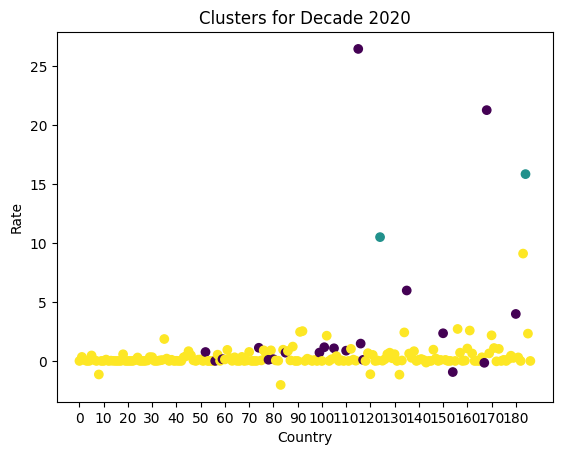

{1890: 13, 1900: 15, 1910: 13, 1920: 13, 1930: 13, 1940: 40, 1950: 3, 1960: 42, 1970: 1, 1980: 1, 1990: 2, 2000: 164, 2010: 1, 2020: 2}
          country  year  Land Impact difference  cluster
14    afghanistan  2020      0.00000        0.0        2
29        albania  2020     20.89000       0.34        2
44        algeria  2020     11.98500      0.085        2
59        andorra  2020      0.00000        0.0        2
74         angola  2020      0.03150     0.0026        2
...           ...   ...          ...        ...      ...
2744   uzbekistan  2020      0.00000        0.0        2
2759      vanuatu  2020     16.73900     9.0962        2
2774      vietnam  2020    345.10282   15.82982        1
2789        yemen  2020     19.95959   2.316175        2
2804       zambia  2020      0.00000        0.0        2

[187 rows x 5 columns]


In [ ]:
#Importing necessary libraries
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.DataFrame()
df['country'] = data['Country']
df['year']=data['YEAR']
df["Land Impact"] = data["Land Impact(m/decade)"]
df= df.assign(difference = data['difference'])
df.tail(75)
df = df.dropna()

years = [1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]

countries_in_clusters={}
for year in years:
    # Getting the data for the current year
    decade_data = df[df['year'] == year]
    country_values = decade_data.drop(['year','country'], axis=1).values
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(country_values)
    labels = kmeans.predict(country_values)
    decade_data['cluster'] = labels
    centroids = kmeans.cluster_centers_
    for i in range(3):
      print(f"Countries in Cluster {i+1}:")
      print(list(decade_data[decade_data['cluster'] == i]['country']))
    avg_values = []
    # for i in range(3):
    #   cluster_avg = decade_data[decade_data['cluster'] == i].mean()
    #   avg_values.append(cluster_avg['cluster'])
    cluster_means = decade_data.groupby('cluster')['difference'].mean()
    # max_cluster_idx = avg_values.index(max(avg_values))
    max_cluster_idx = cluster_means.idxmax()
    countries_in_clusters[year]=len(decade_data[decade_data['cluster']==max_cluster_idx])

    print('Cluster Centers:')
    print(centroids)
    print('Number of countries in each cluster:')
    print(np.bincount(labels))
#     num_points = decade_data.groupby('cluster').size().values

# # Calculate the total number of points in all clusters
#     total_points = num_points.sum()
#     print("total points",total_points)
    # plt.scatter(decade_data['country'], decade_data['difference'], c=decade_data['cluster'])
    # plt.title('Clusters for Decade'+" "+str(year))
    # plt.xlabel('Country Number')

    # plt.ylabel('Rate')
    # plt.show()
    unique_countries, codes = np.unique(decade_data['country'], return_inverse=True)

# Plot the clusters with numerical codes on the x-axis
    plt.scatter(codes, decade_data['difference'], c=decade_data['cluster'])
    plt.title('Clusters for Decade'+" "+str(year))
    plt.xlabel('Country')
    plt.xticks(range(0,188,10))
    plt.ylabel('Rate')
    plt.show()
print(countries_in_clusters)
print(decade_data)



In [ ]:
print(countries_in_clusters)

{1890: 13, 1900: 15, 1910: 13, 1920: 13, 1930: 13, 1940: 40, 1950: 3, 1960: 42, 1970: 1, 1980: 1, 1990: 2, 2000: 164, 2010: 1, 2020: 2}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-5e872c186623>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['australia', 'benin', 'brazil', 'cambodia', 'costa rica', "côte d'ivoire", 'france', 'germany', 'ghana', 'greece', 'italy', 'jordan', 'kazakhstan', 'kenya', 'madagascar', 'malaysia', 'montenegro', 'oman', 'panama', 'peru', 'romania', 'russia', 'saint lucia', 'senegal', 'sierra leone', 'spain', 'thailand', 'timor-leste', 'togo', 'tonga', 'turkey']
Countries in Cluster 2:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', '

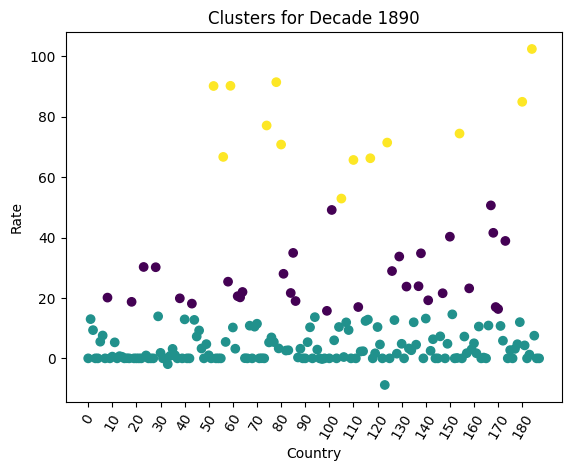

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-5e872c186623>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'libya', 'liechtenstein', 'lithuania', 'luxembourg', 'malawi', 

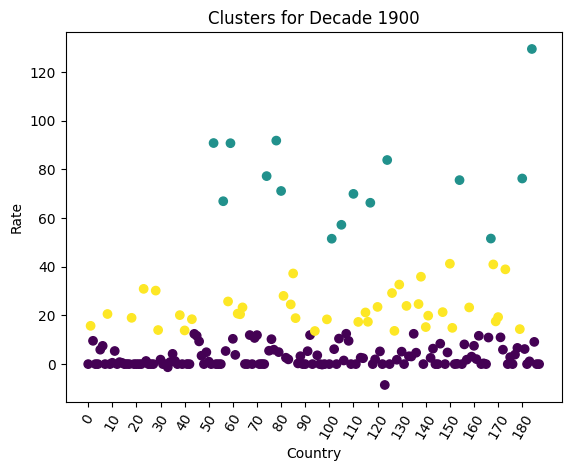

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-5e872c186623>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithu

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-5e872c186623>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithu

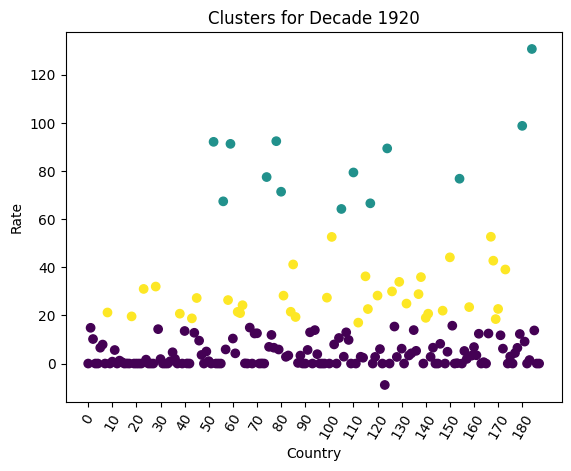

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-5e872c186623>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithuania', 'luxembourg', 

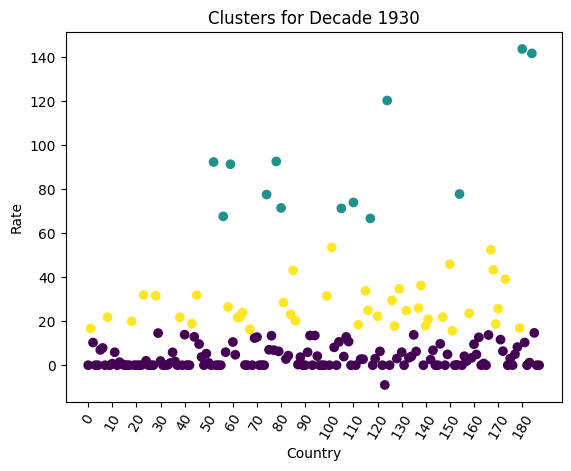

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-5e872c186623>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithuania', 'luxembourg', 

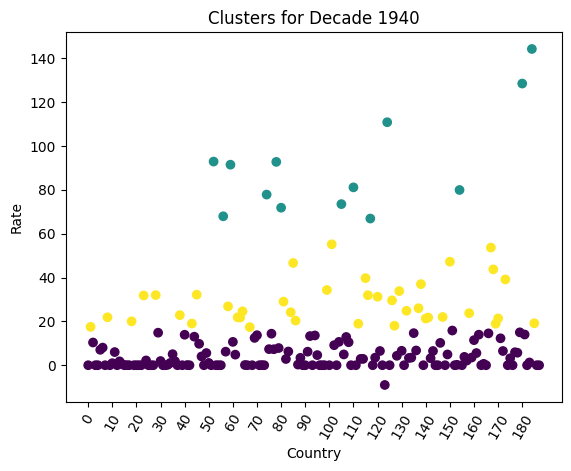

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-5e872c186623>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'france', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'italy', 'jam

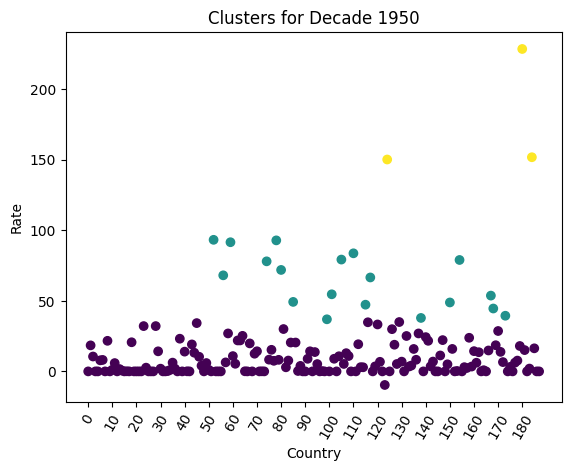

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-5e872c186623>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithuania', 'luxembourg', 

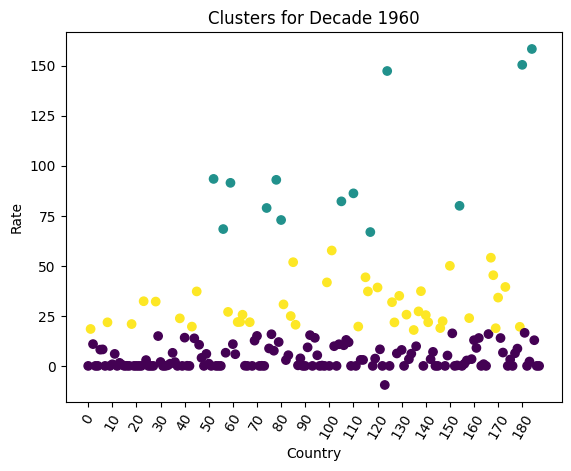

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-5e872c186623>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'france', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'italy', 'jam

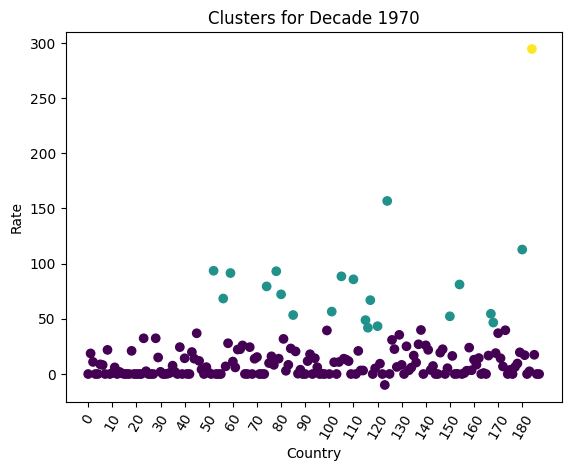

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-5e872c186623>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'france', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'italy', 'jam

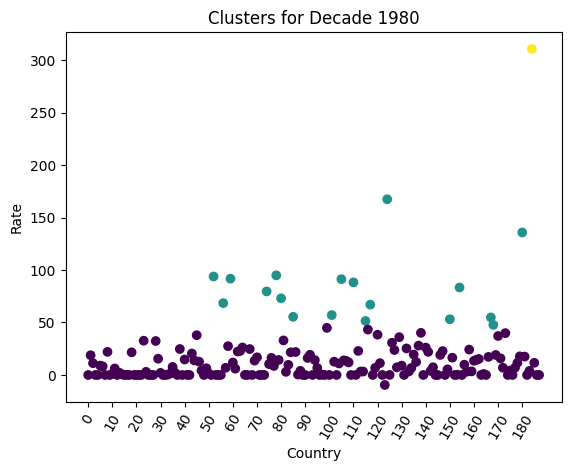

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-5e872c186623>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['denmark', 'equatorial guinea', 'fiji', 'gabon', 'iceland', 'iraq', 'israel', 'kazakhstan', 'madagascar', 'malaysia', 'mauritania', 'myanmar', 'namibia', 'nauru', 'new zealand', 'portugal', 'russia', 'sierra leone', 'solomon islands', 'thailand', 'timor-leste', 'turkey', 'united states of america']
Countries in Cluster 2:
['monaco', 'north korea', 'vietnam']
Countries in Cluster 3:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democr

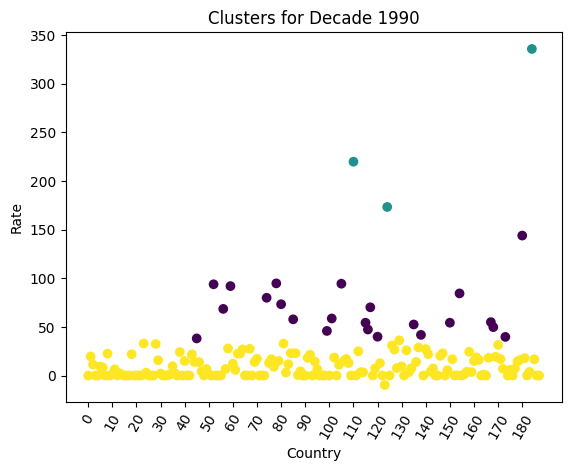

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-5e872c186623>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'france', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'italy', 'jam

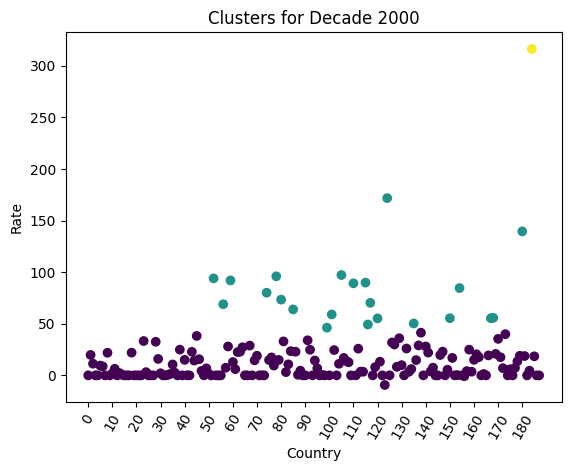

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-5e872c186623>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'france', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'italy', 'jam

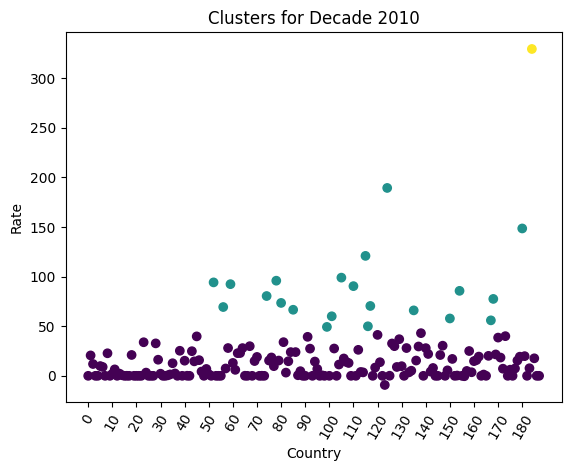

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-5e872c186623>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['equatorial guinea', 'fiji', 'gabon', 'iceland', 'iraq', 'israel', 'kazakhstan', 'madagascar', 'malaysia', 'mauritania', 'monaco', 'myanmar', 'namibia', 'nauru', 'portugal', 'sierra leone', 'solomon islands', 'thailand', 'timor-leste', 'united states of america']
Countries in Cluster 2:
['north korea', 'vietnam']
Countries in Cluster 3:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibo

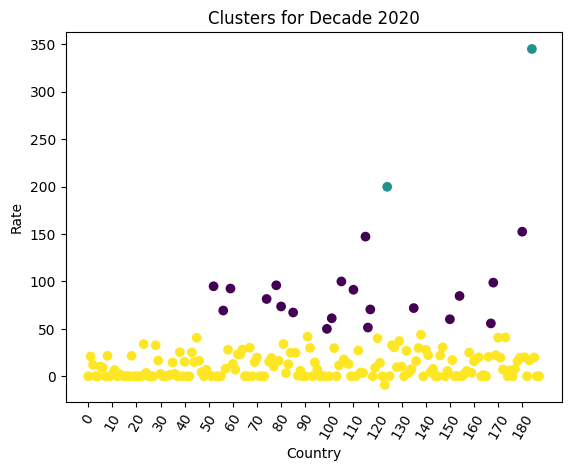

{1890: 13, 1900: 15, 1910: 13, 1920: 13, 1930: 13, 1940: 13, 1950: 3, 1960: 13, 1970: 1, 1980: 1, 1990: 3, 2000: 1, 2010: 1, 2020: 2}
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  43  39  40  41  42  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187]


In [ ]:
#Importing necessary libraries and packages
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Creating a dataframe
df=pd.DataFrame()
df['country'] = data['Country']
df['year']=data['YEAR']
df["Land Impact"] = data["Land Impact(m/decade)"]
df.tail(75)
df = df.dropna()

# Get the years (decades)
years = [1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]
# print(years)
countries_in_clusters={}
for year in years:
    # Getting the data for the current year
    decade_data = df[df['year'] == year]
    country_values = decade_data.drop(['year','country'], axis=1).values
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(country_values)
    labels = kmeans.predict(country_values)
    decade_data['cluster'] = labels
    centroids = kmeans.cluster_centers_
    for i in range(3):
      print(f"Countries in Cluster {i+1}:")
      print(list(decade_data[decade_data['cluster'] == i]['country']))
    avg_values = []
    cluster_means = decade_data.groupby('cluster')['Land Impact'].mean()
    print("cluster_means",cluster_means)
    max_cluster_idx = cluster_means.idxmax()
    print("max_cluster_idx",max_cluster_idx)
    min_cluster_idx = cluster_means.idxmin()
    print("min_cluster_idx",min_cluster_idx)
    max2_cluster_idx = (cluster_means.drop(cluster_means.idxmax())).idxmax()
    print("max2_cluster_idx",max2_cluster_idx)
    countries_in_clusters[year]=len(decade_data[decade_data['cluster']==max_cluster_idx])

    print('Cluster Centers:')
    print(centroids)
    print('Number of countries in each cluster:')
    print(np.bincount(labels))
    unique_countries, codes = np.unique(decade_data['country'], return_inverse=True)

# Plotting the clusters with numerical codes on the x-axis
    plt.scatter(codes, decade_data['Land Impact'], c=decade_data['cluster'])
    plt.title('Clusters for Decade'+" "+str(year))
    plt.xlabel('Country')
    plt.xticks(range(0,188,10),rotation=60)

    plt.ylabel('Rate')
    plt.show()
print(countries_in_clusters)
print(codes)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-8434ac32bbbc>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['australia', 'benin', 'brazil', 'cambodia', 'costa rica', "côte d'ivoire", 'france', 'germany', 'ghana', 'greece', 'italy', 'jordan', 'kazakhstan', 'kenya', 'madagascar', 'malaysia', 'montenegro', 'oman', 'panama', 'peru', 'romania', 'russia', 'saint lucia', 'senegal', 'sierra leone', 'spain', 'thailand', 'timor-leste', 'togo', 'tonga', 'turkey']
Countries in Cluster 2:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', '

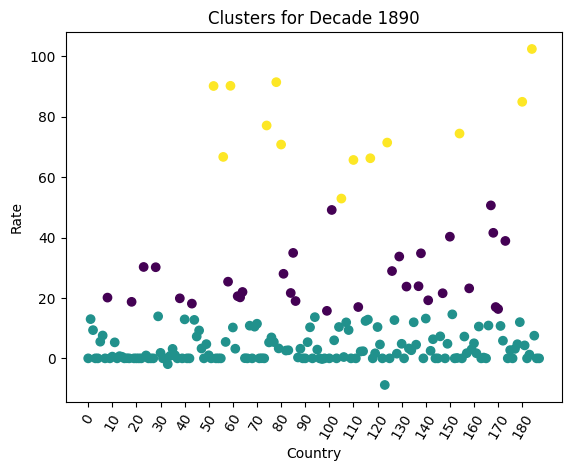

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-8434ac32bbbc>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'libya', 'liechtenstein', 'lithuania', 'luxembourg', 'malawi', 

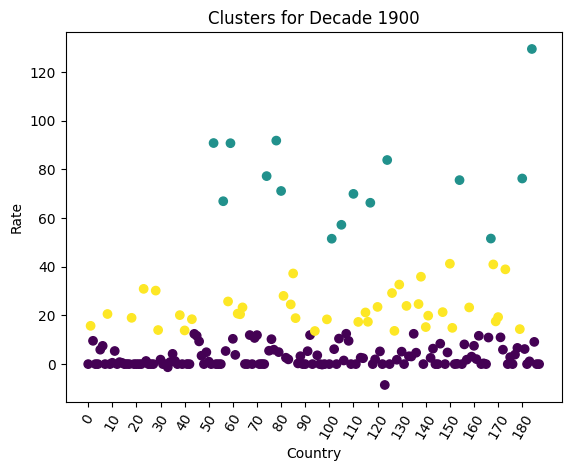

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-8434ac32bbbc>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithu

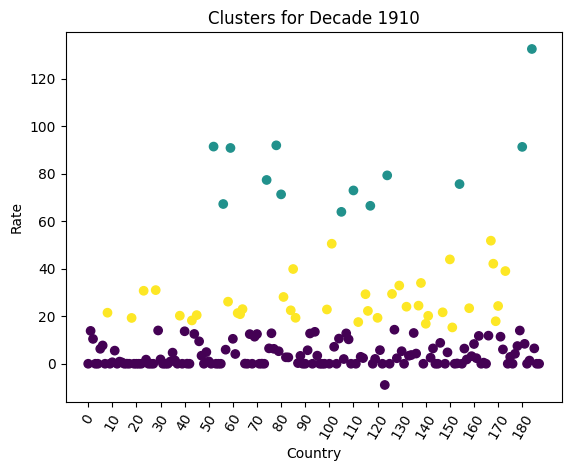

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-8434ac32bbbc>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithu

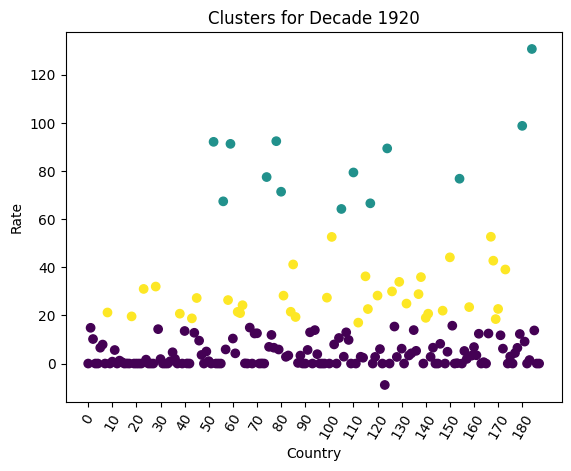

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-8434ac32bbbc>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithuania', 'luxembourg', 

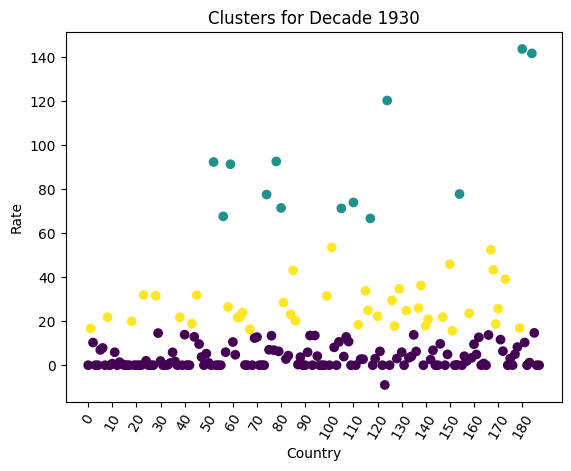

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-8434ac32bbbc>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithuania', 'luxembourg', 

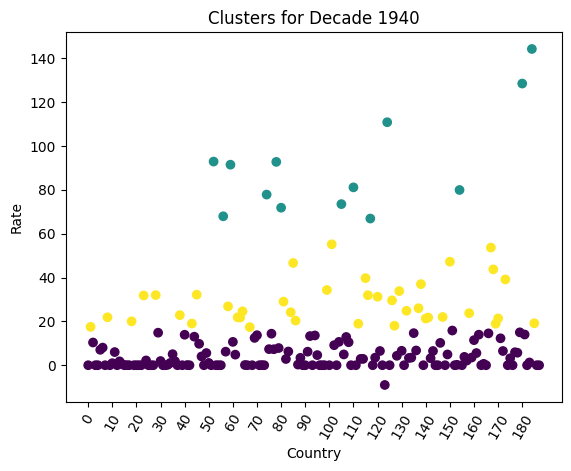

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-8434ac32bbbc>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'france', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'italy', 'jam

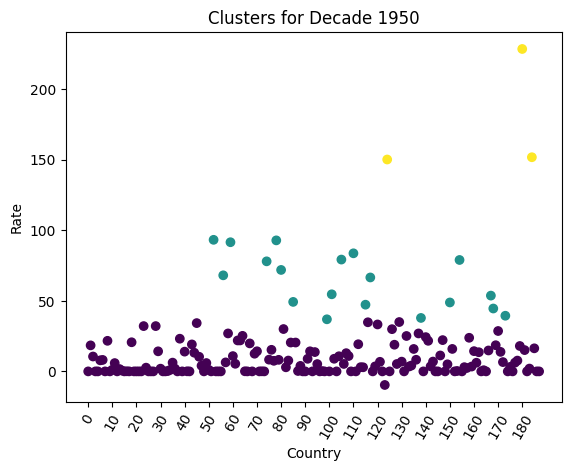

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-8434ac32bbbc>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'gambia', 'georgia', 'grenada', 'guatemala', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'jamaica', 'japan', 'kiribati', 'kuwait', 'kyrgyzstan', 'laos', 'latvia', 'lebanon', 'lesotho', 'liberia', 'libya', 'liechtenstein', 'lithuania', 'luxembourg', 

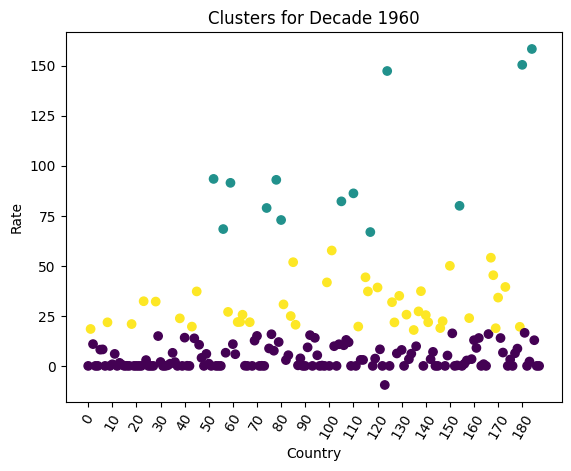

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-8434ac32bbbc>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'france', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'italy', 'jam

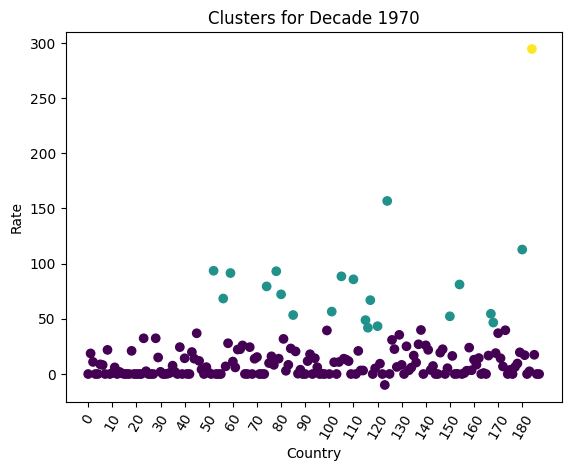

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-8434ac32bbbc>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'france', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'italy', 'jam

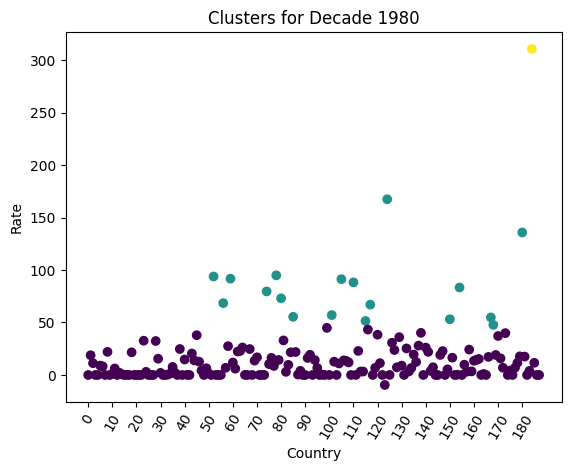

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-8434ac32bbbc>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['denmark', 'equatorial guinea', 'fiji', 'gabon', 'iceland', 'iraq', 'israel', 'kazakhstan', 'madagascar', 'malaysia', 'mauritania', 'myanmar', 'namibia', 'nauru', 'new zealand', 'portugal', 'russia', 'sierra leone', 'solomon islands', 'thailand', 'timor-leste', 'turkey', 'united states of america']
Countries in Cluster 2:
['monaco', 'north korea', 'vietnam']
Countries in Cluster 3:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democr

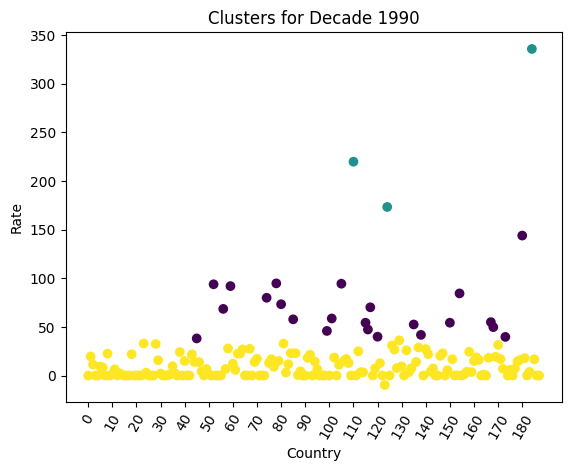

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-8434ac32bbbc>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'france', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'italy', 'jam

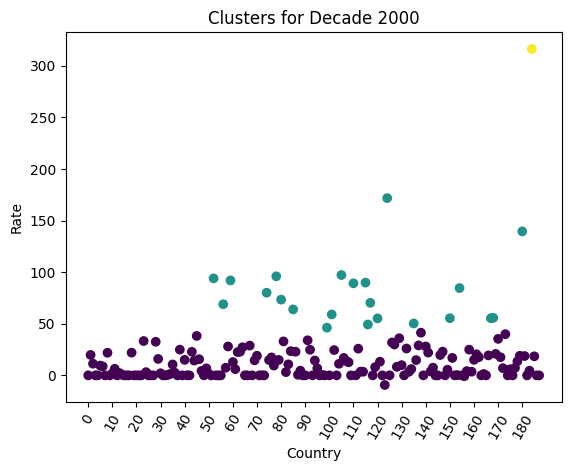

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-8434ac32bbbc>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibouti', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'eritrea', 'estonia', 'ethiopia', 'finland', 'france', 'gambia', 'georgia', 'germany', 'ghana', 'greece', 'grenada', 'guatemala', 'guinea', 'guinea-bissau', 'guyana', 'haiti', 'holy see', 'honduras', 'hungary', 'india', 'indonesia', 'iran', 'ireland', 'italy', 'jam

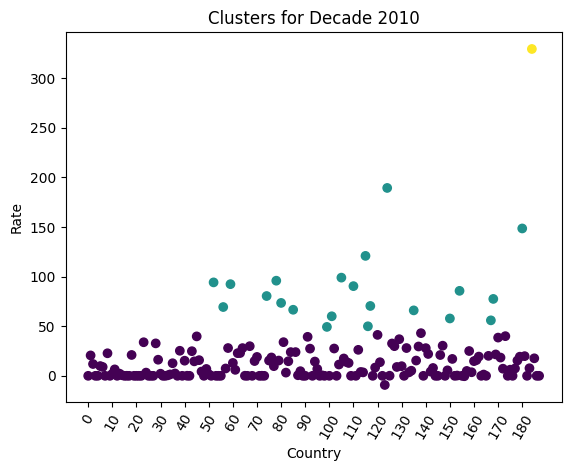

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-8434ac32bbbc>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decade_data['cluster'] = labels


Countries in Cluster 1:
['equatorial guinea', 'fiji', 'gabon', 'iceland', 'iraq', 'israel', 'kazakhstan', 'madagascar', 'malaysia', 'mauritania', 'monaco', 'myanmar', 'namibia', 'nauru', 'portugal', 'sierra leone', 'solomon islands', 'thailand', 'timor-leste', 'united states of america']
Countries in Cluster 2:
['north korea', 'vietnam']
Countries in Cluster 3:
['afghanistan', 'albania', 'algeria', 'andorra', 'angola', 'antigua and barbuda', 'argentina', 'armenia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'central african republic', 'chad', 'chile', 'china', 'colombia', 'comoros', 'congo (congo-brazzaville)', 'costa rica', "côte d'ivoire", 'croatia', 'cuba', 'cyprus', 'czechia (czech republic)', 'democratic republic of the congo', 'denmark', 'djibo

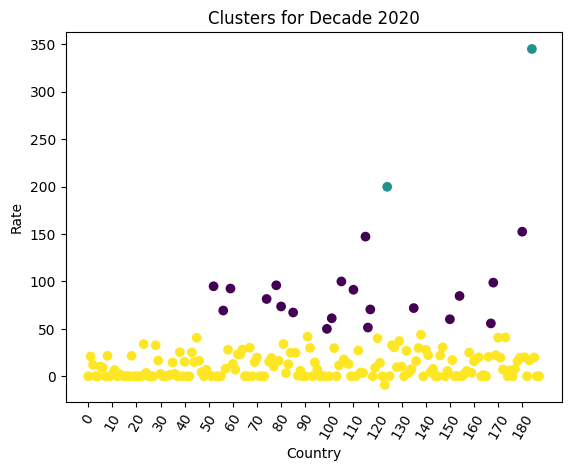

{}
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  43  39  40  41  42  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187]


In [ ]:
#Importing necessary libraries and packages
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Creating a dataframe
df=pd.DataFrame()
df['country'] = data['Country']
df['year']=data['YEAR']
df["Land Impact"] = data["Land Impact(m/decade)"]
df.tail(75)
df = df.dropna()

# Get the years (decades)
years = [1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]
# print(years)
# countries_in_clusters={}
countries_in_clusters_max={}
countries_in_clusters_max2={}
countries_in_clusters_min={}
for year in years:
    # Getting the data for the current year
    decade_data = df[df['year'] == year]
    country_values = decade_data.drop(['year','country'], axis=1).values
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(country_values)
    labels = kmeans.predict(country_values)
    decade_data['cluster'] = labels
    centroids = kmeans.cluster_centers_
    for i in range(3):
      print(f"Countries in Cluster {i+1}:")
      print(list(decade_data[decade_data['cluster'] == i]['country']))
    avg_values = []
    cluster_means = decade_data.groupby('cluster')['Land Impact'].mean()
    print("cluster_means",cluster_means)
    max_cluster_idx = cluster_means.idxmax()
    print("max_cluster_idx",max_cluster_idx)
    min_cluster_idx = cluster_means.idxmin()
    print("min_cluster_idx",min_cluster_idx)
    max2_cluster_idx = (cluster_means.drop(cluster_means.idxmax())).idxmax()
    print("max2_cluster_idx",max2_cluster_idx)
    countries_in_clusters_max[year]=len(decade_data[decade_data['cluster']==max_cluster_idx])
    countries_in_clusters_max2[year]=len(decade_data[decade_data['cluster']==max2_cluster_idx])
    countries_in_clusters_min[year] = len(decade_data[decade_data['cluster']==min_cluster_idx])
    print('Cluster Centers:')
    print(centroids)
    print('Number of countries in each cluster:')
    print(np.bincount(labels))
    unique_countries, codes = np.unique(decade_data['country'], return_inverse=True)

# Plotting the clusters with numerical codes on the x-axis
    plt.scatter(codes, decade_data['Land Impact'], c=decade_data['cluster'])
    plt.title('Clusters for Decade'+" "+str(year))
    plt.xlabel('Country')
    plt.xticks(range(0,188,10),rotation=60)

    plt.ylabel('Rate')
    plt.show()
print(countries_in_clusters)
print(codes)


In [ ]:
import matplotlib.pyplot as plt
import random
keys = list(countries_in_clusters.keys())
values = list(countries_in_clusters.values())
num_bars=15
# bar_heights = [random.randint(1, 10) for i in range(num_bars)]
# colors = [random.choice(['r', 'g', 'b', 'y', 'm', 'c', 'k']) for i in range(num_bars)]
colors = [tuple(random.random() for _ in range(3)) for _ in range(len(countries_in_clusters))]
fig,ax = plt.subplots()
ax.bar(keys,values,width=5,color=colors)
# Set the title and axis labels
plt.title('Number of countries submerging at higher rate decade wise')
plt.xlabel('decades')
plt.ylabel('Number of countries')
plt.xticks(keys,rotation=75)
plt.yticks(range(0,190,10))

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import random
keys = list(countries_in_clusters_max.keys())
values1 = list(countries_in_clusters_max.values())
values2 = list(countries_in_clusters_max2.values())
values3 = list(countries_in_clusters_min.values())
# print(values1,values2,values3)
num_bars=15
# bar_heights = [random.randint(1, 10) for i in range(num_bars)]
# colors = [random.choice(['r', 'g', 'b', 'y', 'm', 'c', 'k']) for i in range(num_bars)]
# colors = [tuple(random.random() for _ in range(3)) for _ in range(len(countries_in_clusters))]
# fig,ax = plt.subplots()
# ax.bar(keys,values,width=5,color=colors)
print(len(keys))
plt.bar(keys, values1,width=5, label='higher_rate', color='blue')

plt.bar(keys, values2,width=5, label='medium_rate', bottom=values1, color='green')
plt.bar(keys, values3,width=5, label='lower_rate', bottom=np.add(values1, values2), color='orange')
# Set the title and axis labels
plt.title('Number of countries with submerging rates decade wise')
plt.xlabel('decades')
plt.ylabel('Number of countries')
plt.xticks(keys,rotation=75)
plt.yticks(range(0,190,10))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Show the plot
plt.show()


14


In [ ]:
import pandas as pd

model1 = pd.read_csv("/content/landimpact.csv")
avg_model1 = model1['RMSE'].mean()
print(avg_model1)


model2 = pd.read_csv("/content/landimpact_lr.csv")
model2.columns
avg_model2 = model2['RMSE_test'].mean()
print(avg_model2)


model3 = pd.read_csv("/content/landimpact_pr.csv")
model3.columns
avg_model3 = model3['RMSE_test'].mean()
print(avg_model3)


model4 = pd.read_csv("/content/landimpact_rfr.csv")
model4.columns
avg_model4 = model4['RMSE_test'].mean()
print(avg_model4)


model5 = pd.read_csv("/content/landimpact_rr.csv")
model5.columns
avg_model5 = model5['RMSE_test'].mean()
print(avg_model5)




19.075018797567473
1.4794575076065641
5.291657085477946
1.3648603609905372
1.2541588468821034


In [ ]:
data.columns


Index(['S.No', 'Country', 'Continent', 'LandArea', 'Coastal_length', 'YEAR',
       'Temperaturecountrywise', 'ANNUAL_BALANCE', 'sea level',
       'Land Impact(m/decade)'],
      dtype='object')

In [ ]:
import pandas as pd

# Load your dataset with country, coastal line length, and submergence rates for each decade
data = pd.read_csv('/content/land submerged - land submerged (1).csv')
landimpact_countrywise = pd.DataFrame(columns = ['Country','Land Impact_2020'])

# Iterate through the dataset
for index, row in data.iterrows():
    country = row['Country']
    coastal_line = row['Coastal_length']
    if(row['YEAR']==2020):
      submergence_rate_2020 = row['Land Impact(m/decade)']

    # Assuming the column name for the 2020 submergence rate is '2020'

    # Calculate the impact for the 2020 decade
      impact_2020 = coastal_line * submergence_rate_2020
      print(impact_2020)
      landimpact_countrywise.loc[len(landimpact_countrywise)] = pd.Series([country,impact_2020],index=['Country','Land Impact_2020'])

    # Store the result in the dataset
      # data.loc[index, '2020_Impact'] = impact_2020

# Display the updated dataset with land impacts for the 2020 decade
# print(data.head(50))
print(landimpact_countrywise)




0.0
13557.61
191760.0
0.0
724.5
2974.6769999999997
757037.4
0.0
14346567.025
0.0
1741.5645
230975.5
2.346
73217.1
58.15441
0.0
3.0020000000000002
18.893
3300.975
0.0
0.0
2.323e-06
0.0
11322967.4
1620.065
0.0
0.0
0.0
359909.0
297900.0
6504750.000000001
0.0
0.0
433086.00000000006
217384.0
858037.0
1216.117
0.1688
532066.5
14222.448
482.22
2211250.0
52.4722
0.0
2655.0
2149468.0
7210.711
661.96
0.0
323058.0
103250.0
0.0
57215.655000000006
118.32000000000001
2.9769
0.0
3187984.0
2466354.4
2044087.6
185000.2
144232.0
2616.96
831600.0
17427.178
4264089.0
19.706400000000002
0.0
483072.0
0.0
179150.4
39572.0
0.0
1516.1999999999998
0.0
6927500.0
2655336.0
18453568.0
607877.0
10073.1729
1042803.2000000001
15085.539999999999
3123860.0
2913.225
366951.5
670.8501
3026317.4999999995
395752.0
7016.79
4456.62
0.0
0.0
23629.522517999998
8797.3032
0.0
12279.054399999999
14002.4
0.0
147.89334
0.0
4948339.968
0.0
5687275.5
19275.165
0.0
2282.742
1299899.9
8869.472000000002
3331957.16
792561.41
0.0
34939.97

In [ ]:
landimpact_countrywise.sort_values('Land Impact_2020',inplace =True,ascending = False)
landimpact_countrywise

import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
# df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df = landimpact_countrywise
print(df.values)
# Plot the heatmap
# plt.figure()
# plt.imshow(df.values, cmap="hot")
# plt.xlabel("A")
# plt.ylabel("B")
# plt.title("Heatmap of a DataFrame with 2 columns")
# plt.show()


[['united states of america' 203202386.7]
 ['russia' 48332467.3]
 ['vietnam' 39341721.480000004]
 ['indonesia' 18453568.0]
 ['australia' 14346567.025]
 ['brazil' 11322967.4]
 ['solomon islands' 8382448.8]
 ['iceland' 6927500.0]
 ['new zealand' 6899091.999999999]
 ['canada' 6504750.000000001]
 ['malaysia' 5687275.5]
 ['sweden' 5283094.08]
 ['madagascar' 4948339.968]
 ['greece' 4264089.0]
 ['thailand' 3957021.7]
 ['united kingdom' 3847252.4]
 ['myanmar' 3387067.8600000003]
 ['mexico' 3331957.16]
 ['turkey' 3320190.0]
 ['fiji' 3187984.0]
 ['italy' 3123860.0]
 ['kazakhstan' 3026317.4999999995]
 ['india' 2655336.0]
 ['finland' 2466354.4]
 ['cuba' 2211250.0]
 ['denmark' 2149468.0]
 ['panama' 2079190.4]
 ['papua new guinea' 2078398.2]
 ['france' 2044087.6]
 ['portugal' 2013256.0]
 ['spain' 1824635.0]
 ['saudi arabia' 1665789.28]
 ['mauritania' 1299899.9]
 ['philippines' 1197613.437]
 ['ireland' 1042803.2000000001]
 ['sierra leone' 1022125.0]
 ['namibia' 924899.4]
 ['oman' 916716.64]
 ['peru' 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with 'Country' and '2020_Impact' columns
# data = pd.DataFrame({
#     'Country': ['Country A', 'Country B', 'Country C', 'Country D', 'Country E'],
#     '2020_Impact': [200, 300, 220, 150, 250]
# })
data = landimpact_countrywise
# Sort the data by '2020_Impact' column in descending order
data = data.sort_values(by='Land Impact_2020', ascending=False)

# Take the top 5 countries
top_5_countries = data.head(5)

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
plt.barh(top_5_countries['Country'], top_5_countries['Land Impact_2020'], color='green')

# Customize the plot
plt.title('Top 5 Countries with Highest Land Impact in 2020')
plt.xlabel('Impact')
plt.ylabel('Countries')

# Display the plot
plt.show()


In [ ]:
d = pd.read_csv('/content/land submerged - land submerged (1).csv')
d[d['Country']=='maldives']

S.No   Country Continent  LandArea  Coastal_length  YEAR  \
1530  1561  maldives      Asia       300             650  1880   
1531  1562  maldives      Asia       300             650  1890   
1532  1563  maldives      Asia       300             650  1900   
1533  1564  maldives      Asia       300             650  1910   
1534  1565  maldives      Asia       300             650  1920   
1535  1566  maldives      Asia       300             650  1930   
1536  1567  maldives      Asia       300             650  1940   
1537  1568  maldives      Asia       300             650  1950   
1538  1569  maldives      Asia       300             650  1960   
1539  1570  maldives      Asia       300             650  1970   
1540  1571  maldives      Asia       300             650  1980   
1541  1572  maldives      Asia       300             650  1990   
1542  1573  maldives      Asia       300             650  2000   
1543  1574  maldives      Asia       300             650  2010   
1544  1575  maldives      Asia       300             650  2020   

      Temperaturecountrywise  ANNUAL_BALANCE   sea level  \
1530                  27.620             NaN -174.320729   
1531                  27.620             NaN -162.654063   
1532                  27.620             NaN -150.394062   
1533                  27.620      -89.000000 -138.367396   
1534                  27.620     -433.900000 -130.934063   
1535                  27.578      -47.500000 -120.800729   
1536                  27.580     -528.533333 -102.664062   
1537                  27.571     -342.568355  -80.700729   
1538                  27.547     -120.785417  -67.524062   
1539                  27.544     -132.906762  -49.660729   
1540                  27.758     -284.861137  -30.914062   
1541                  27.914     -439.661852  -14.790729   
1542                  27.750     -769.887645   14.662604   
1543                  27.736     -923.870581   48.960947   
1544                  27.760     -872.500000   66.704325   

      Land Impact(m/decade)  
1530               5.561310  
1531               5.978460  
1532               6.141763  
1533               7.144300  
1534               7.954000  
1535               8.105400  
1536               9.134300  
1537               8.948540  
1538               9.854603  
1539              10.684350  
1540              12.684000  
1541              18.513510  
1542              24.513500  
1543              27.514310  
1544              29.654100